In [1]:
import json
from pymongo import MongoClient
import tqdm
import matplotlib.pyplot as plt
import numpy as np
from dotenv import load_dotenv
from motor.motor_asyncio import AsyncIOMotorClient
load_dotenv()
import os

MONGO_URL = os.getenv("MONGO_URI")
print(MONGO_URL)
# client = MongoClient(MONGO_URL)
client = AsyncIOMotorClient(MONGO_URL)
db = client["embedded-rift"]
collection = db["games"]

mongodb://localhost:27017/


In [2]:
async def fetch_data():
    times_all = {"15": [], "14": []}
    
    # Use async cursor
    async for x in collection.find({}, {"metadata.season": 1, "result.gameDuration": 1}):
        season = x["metadata"]["season"]
        duration = x["result"]["gameDuration"] / 60
        times_all[season].append(duration)
    
    return times_all

times_all = await fetch_data()
times_s15 = times_all["15"]
times_s14 = times_all["14"]
times_all = times_s15 + times_s14


Average game duration (Season 14): 26.65, Median: 26.82, Std: 6.92
Average game duration (Season 15): 26.95, Median: 27.47, Std: 6.85
Average game duration (All Seasons): 26.80, Median: 27.15, Std: 6.88


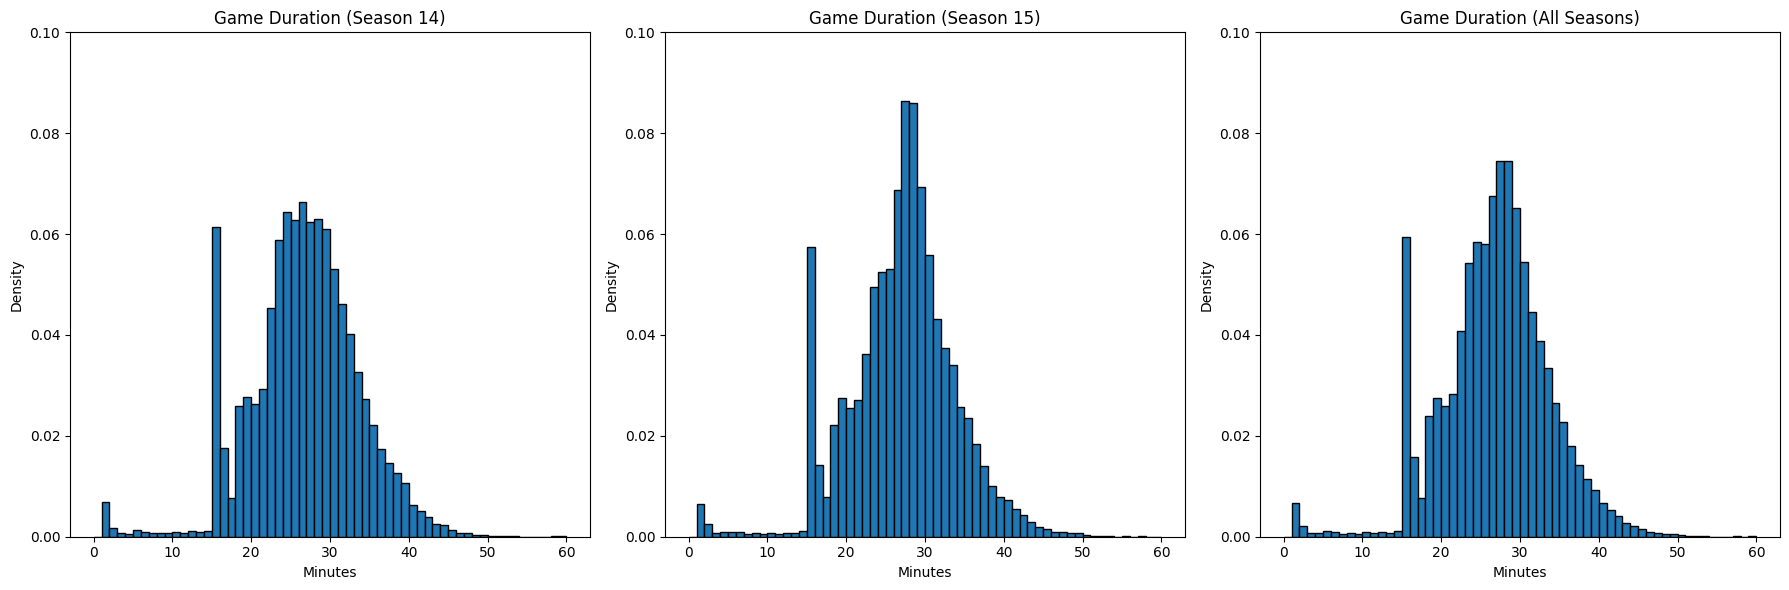

In [3]:
import numpy as np
print(f"Average game duration (Season 14): {np.mean(times_s14):.2f}, Median: {np.median(times_s14):.2f}, Std: {np.std(times_s14):.2f}")
print(f"Average game duration (Season 15): {np.mean(times_s15):.2f}, Median: {np.median(times_s15):.2f}, Std: {np.std(times_s15):.2f}")
print(f"Average game duration (All Seasons): {np.mean(times_all):.2f}, Median: {np.median(times_all):.2f}, Std: {np.std(times_all):.2f}")

plt.figure(figsize=(18, 6))

# Histogram for Season 14
plt.subplot(1, 3, 1)
plt.hist(times_s14, bins=60, range=(0, 60), edgecolor='black', density=True)
plt.xlabel('Minutes')
plt.ylabel('Density')
plt.title('Game Duration (Season 14)')
plt.ylim(0, 0.10)

# Histogram for Season 15
plt.subplot(1, 3, 2)
plt.hist(times_s15, bins=60, range=(0, 60), edgecolor='black', density=True)
plt.xlabel('Minutes')
plt.ylabel('Density')
plt.title('Game Duration (Season 15)')
plt.ylim(0, 0.10)


# Histogram for All Seasons
plt.subplot(1, 3, 3)
plt.hist(times_all, bins=60, range=(0, 60), edgecolor='black', density=True)
plt.xlabel('Minutes')
plt.ylabel('Density')
plt.title('Game Duration (All Seasons)')
plt.ylim(0, 0.10)

# Show the figures
plt.tight_layout()

Average game duration (Season 14): 27.04, Median: 26.95, Std: 6.32
Average game duration (Season 15): 27.35, Median: 27.55, Std: 6.22
Average game duration (All Seasons): 27.20, Median: 27.32, Std: 6.27


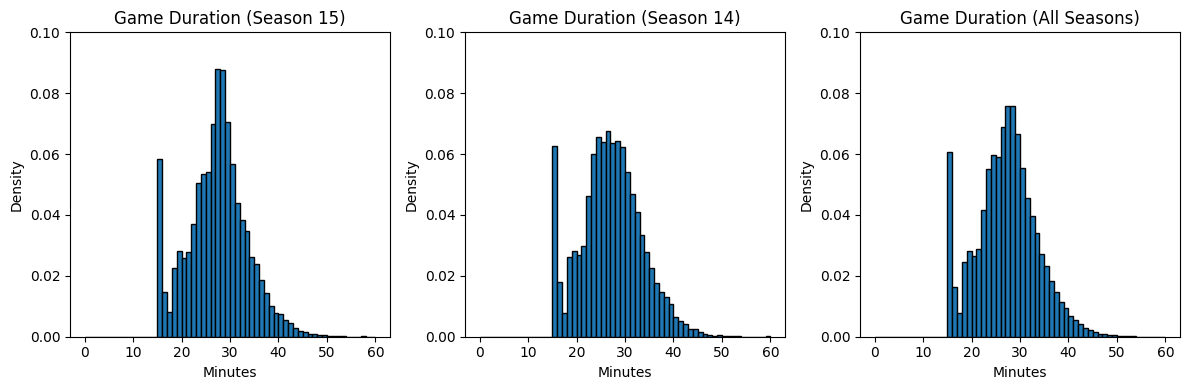

In [4]:
import numpy as np
times_s15 = [x for x in times_s15 if x > 15]
times_s14 = [x for x in times_s14 if x > 15]
times_all = [x for x in times_all if x > 15]
print(f"Average game duration (Season 14): {np.mean(times_s14):.2f}, Median: {np.median(times_s14):.2f}, Std: {np.std(times_s14):.2f}")
print(f"Average game duration (Season 15): {np.mean(times_s15):.2f}, Median: {np.median(times_s15):.2f}, Std: {np.std(times_s15):.2f}")
print(f"Average game duration (All Seasons): {np.mean(times_all):.2f}, Median: {np.median(times_all):.2f}, Std: {np.std(times_all):.2f}")

plt.figure(figsize=(12, 4))

# Histogram for Season 15
plt.subplot(1, 3, 1)
plt.hist(times_s15, bins=60, range=(0, 60), edgecolor='black', density=True)
plt.xlabel('Minutes')
plt.ylabel('Density')
plt.title('Game Duration (Season 15)')
plt.ylim(0, 0.10)

# Histogram for Season 14
plt.subplot(1, 3, 2)
plt.hist(times_s14, bins=60, range=(0, 60), edgecolor='black', density=True)
plt.xlabel('Minutes')
plt.ylabel('Density')
plt.title('Game Duration (Season 14)')
plt.ylim(0, 0.10)

# Histogram for All Seasons
plt.subplot(1, 3, 3)
plt.hist(times_all, bins=60, range=(0, 60), edgecolor='black', density=True)
plt.xlabel('Minutes')
plt.ylabel('Density')
plt.title('Game Duration (All Seasons)')
plt.ylim(0, 0.10)

# Show the figures
plt.tight_layout()

In [5]:
all_games = await collection.count_documents({})
print(f"(All) Total games: {all_games}")
blue_wins = await collection.count_documents({"result.teams.blue.win": True})
print(f"(All) Blue wins: {blue_wins} ({blue_wins / all_games * 100:.2f}%)")
red_wins = all_games - blue_wins
print(f"(All) Red wins: {red_wins} ({red_wins / all_games * 100:.2f}%)")

s15_games = await collection.count_documents({"metadata.season": "15"})
print(f"(S15) Total games: {s15_games}")
s15_blue_wins = await collection.count_documents({"metadata.season": "15", "result.teams.blue.win": True})
print(f"(S15) Blue wins: {s15_blue_wins} ({s15_blue_wins / s15_games * 100:.2f}%)")
s15_red_wins = s15_games - s15_blue_wins
print(f"(S15) Red wins: {s15_red_wins} ({s15_red_wins / s15_games * 100:.2f}%)")

s14_games = await collection.count_documents({"metadata.season": "14"})
print(f"(S14) Total games: {s14_games}")
s14_blue_wins = await collection.count_documents({"metadata.season": "14", "result.teams.blue.win": True})
print(f"(S14) Blue wins: {s14_blue_wins} ({s14_blue_wins / s14_games * 100:.2f}%)")
s14_red_wins = s14_games - s14_blue_wins
print(f"(S14) Red wins: {s14_red_wins} ({s14_red_wins / s14_games * 100:.2f}%)")


(All) Total games: 40004
(All) Blue wins: 20743 (51.85%)
(All) Red wins: 19261 (48.15%)
(S15) Total games: 20003
(S15) Blue wins: 10306 (51.52%)
(S15) Red wins: 9697 (48.48%)
(S14) Total games: 20001
(S14) Blue wins: 10437 (52.18%)
(S14) Red wins: 9564 (47.82%)


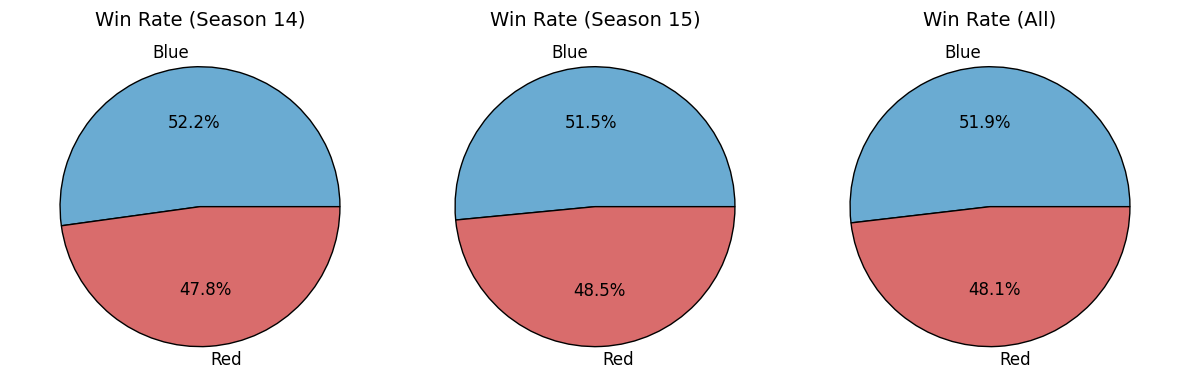

In [6]:

# Define colors with less eye strain
soft_blue = "#6AABD2"  # Softer blue
soft_red = "#D96C6C"   # Softer red

plt.figure(figsize=(12, 4))

# Win Rate (All)
plt.subplot(1, 3, 3)
plt.pie([blue_wins, red_wins], labels=["Blue", "Red"], autopct='%1.1f%%', colors=[soft_blue, soft_red],
        wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 12})
plt.title('Win Rate (All)', fontsize=14)
plt.axis('equal')

# Win Rate (Season 15)
plt.subplot(1, 3, 2)
plt.pie([s15_blue_wins, s15_red_wins], labels=["Blue", "Red"], autopct='%1.1f%%', colors=[soft_blue, soft_red],
        wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 12})
plt.title('Win Rate (Season 15)', fontsize=14)
plt.axis('equal')

# Win Rate (Season 14)
plt.subplot(1, 3, 1)
plt.pie([s14_blue_wins, s14_red_wins], labels=["Blue", "Red"], autopct='%1.1f%%', colors=[soft_blue, soft_red],
        wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 12})
plt.title('Win Rate (Season 14)', fontsize=14)
plt.axis('equal')

# Adjust layout
plt.tight_layout()

In [10]:
from collections import Counter, defaultdict
cursor = collection.find({}, {"result.teams": 1, "metadata.season": 1})
champs = defaultdict(lambda: {"wins": 0, "losses": 0, "games": 0})
champs_s15 = defaultdict(lambda: {"wins": 0, "losses": 0, "games": 0})
champs_s14 = defaultdict(lambda: {"wins": 0, "losses": 0, "games": 0})

async for x in cursor:
    teams = x["result"]["teams"]

    for team in teams.values():
        team_win = team["win"]  # True if the team won, False otherwise
        
        for player in team["participants"]:
            champ_name = player["championName"]

            # Update total games played
            champs[champ_name]["games"] += 1

            if team_win:
                champs[champ_name]["wins"] += 1
            else:
                champs[champ_name]["losses"] += 1

            # Separate season tracking
            if x["metadata"]["season"] == "15":
                champs_s15[champ_name]["games"] += 1
                if team_win:
                    champs_s15[champ_name]["wins"] += 1
                else:
                    champs_s15[champ_name]["losses"] += 1
            else:
                champs_s14[champ_name]["games"] += 1
                if team_win:
                    champs_s14[champ_name]["wins"] += 1
                else:
                    champs_s14[champ_name]["losses"] += 1
                

        

<Figure size 2000x2000 with 0 Axes>

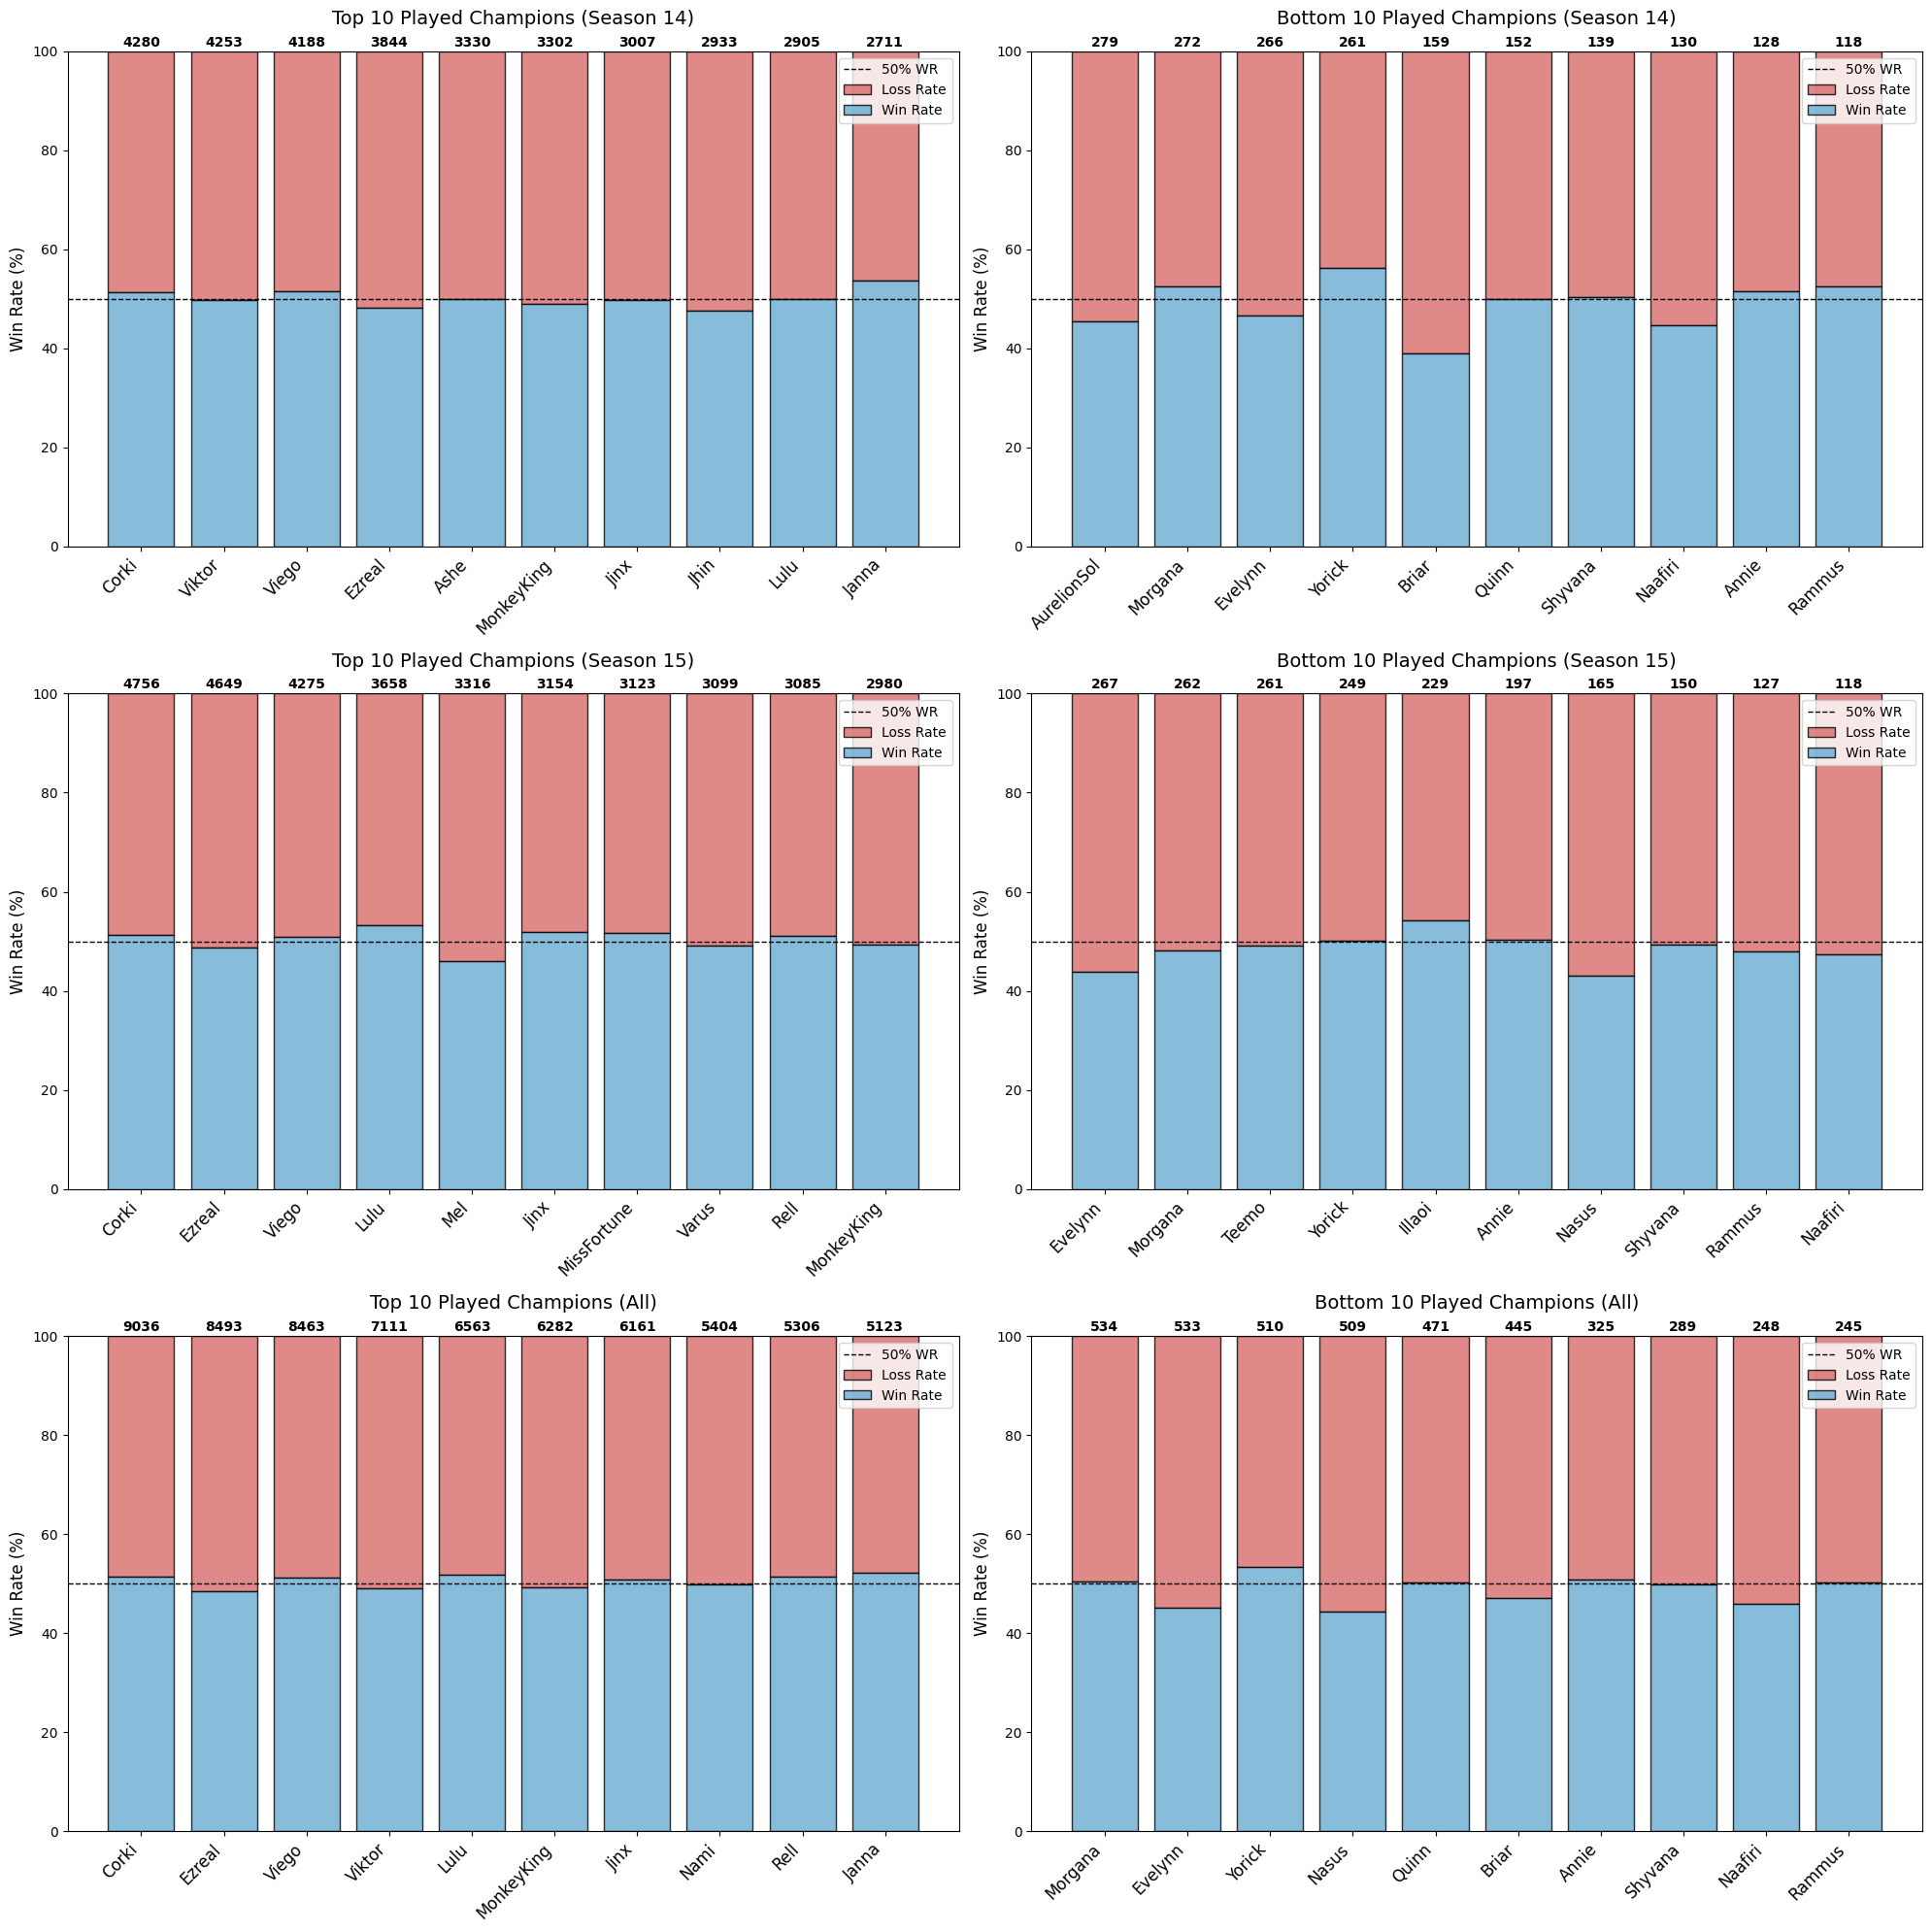

In [11]:
# Sort data by the number of games played for each champion
sorted_champs = sorted(champs.items(), key=lambda x: x[1]["games"], reverse=True)
sorted_champs_s15 = sorted(champs_s15.items(), key=lambda x: x[1]["games"], reverse=True)
sorted_champs_s14 = sorted(champs_s14.items(), key=lambda x: x[1]["games"], reverse=True)

top_10_champs = sorted_champs[:10]
bottom_10_champs = sorted_champs[-10:]
top_10_champs_s15 = sorted_champs_s15[:10]
bottom_10_champs_s15 = sorted_champs_s15[-10:]
top_10_champs_s14 = sorted_champs_s14[:10]
bottom_10_champs_s14 = sorted_champs_s14[-10:]

import numpy as np

def extract_winrate_stats(champ_list):
    labels = [k for k, v in champ_list]
    games = np.array([v["games"] for _, v in champ_list])
    wins = np.array([v["wins"] for _, v in champ_list])
    win_rates = (wins / games) * 100  # Convert to percentage
    loss_rates = 100 - win_rates  # Loss rate as percentage
    return labels, win_rates, loss_rates

labels_top_all, winrate_top_all, lossrate_top_all = extract_winrate_stats(top_10_champs)
labels_bottom_all, winrate_bottom_all, lossrate_bottom_all = extract_winrate_stats(bottom_10_champs)
labels_top_s15, winrate_top_s15, lossrate_top_s15 = extract_winrate_stats(top_10_champs_s15)
labels_bottom_s15, winrate_bottom_s15, lossrate_bottom_s15 = extract_winrate_stats(bottom_10_champs_s15)
labels_top_s14, winrate_top_s14, lossrate_top_s14 = extract_winrate_stats(top_10_champs_s14)
labels_bottom_s14, winrate_bottom_s14, lossrate_bottom_s14 = extract_winrate_stats(bottom_10_champs_s14)


font_size = 12

# Set figure size for better readability
plt.figure(figsize=(20, 20))

# Colors
win_color = "#6AABD2"  # Soft blue for wins
loss_color = "#D96C6C"  # Soft red for losses

# Function to create stacked bar chart with win rate and text annotations for total games played
def plot_stacked_winrate_with_games(subplot_index, labels, winrates, lossrates, champ_list, title):
    plt.subplot(3, 2, subplot_index)
    bars1 = plt.bar(labels, lossrates, bottom=winrates, color=loss_color, edgecolor='black', alpha=0.8, label="Loss Rate")
    bars2 = plt.bar(labels, winrates, color=win_color, edgecolor='black', alpha=0.8, label="Win Rate")

    plt.axhline(y=50, color='black', linestyle='dashed', linewidth=1, label="50% WR")

    plt.xticks(rotation=45, ha='right', fontsize=font_size)
    plt.ylabel("Win Rate (%)", fontsize=12)
    plt.ylim(0, 100)  # Set y-axis to 0-100% for uniform height
    plt.title(title, fontsize=14, pad=20)

    plt.legend()

    # Annotate bars with total games played
    for bar, (champ, data) in zip(bars1, champ_list):
        height = bar.get_height() + bar.get_y()  # Get top of the win bar
        plt.text(bar.get_x() + bar.get_width()/2, height + 1, f"{data['games']}", ha='center', fontsize=10, fontweight='bold')

# Create stacked win rate plots with game counts
plt.figure(figsize=(20, 20))

plot_stacked_winrate_with_games(5, labels_top_all, winrate_top_all, lossrate_top_all, top_10_champs, "Top 10 Played Champions (All)")
plot_stacked_winrate_with_games(6, labels_bottom_all, winrate_bottom_all, lossrate_bottom_all, bottom_10_champs, "Bottom 10 Played Champions (All)")
plot_stacked_winrate_with_games(3, labels_top_s15, winrate_top_s15, lossrate_top_s15, top_10_champs_s15, "Top 10 Played Champions (Season 15)")
plot_stacked_winrate_with_games(4, labels_bottom_s15, winrate_bottom_s15, lossrate_bottom_s15, bottom_10_champs_s15, "Bottom 10 Played Champions (Season 15)")
plot_stacked_winrate_with_games(1, labels_top_s14, winrate_top_s14, lossrate_top_s14, top_10_champs_s14, "Top 10 Played Champions (Season 14)")
plot_stacked_winrate_with_games(2, labels_bottom_s14, winrate_bottom_s14, lossrate_bottom_s14, bottom_10_champs_s14, "Bottom 10 Played Champions (Season 14)")

# Adjust layout for readability
plt.tight_layout()

# Show the figure
plt.show()



In [12]:
# Most common champions
most_common = sorted_champs[:10]
most_common_s15 = sorted_champs_s15[:10]
most_common_s14 = sorted_champs_s14[:10]

# Least common champions
least_common = sorted_champs[::-1][:10]
least_common_s15 = sorted_champs_s15[::-1][:10]
least_common_s14 = sorted_champs_s14[::-1][:10]


In [13]:
print("\nMost common champions (Season 14):")
for champ, data in most_common_s14:
    games = data["games"]
    wins = data["wins"]
    losses = data["losses"]
    print(f"{champ:15} {wins:5}W\t- {losses:5}L ({games:5} games) WR: {wins/games*100:.2f}%")
    
print("\nLeast common champions (Season 14):")
for champ, data in least_common_s14:
    games = data["games"]
    wins = data["wins"]
    losses = data["losses"]
    print(f"{champ:15} {wins:5}W\t- {losses:5}L ({games:5} games) WR: {wins/games*100:.2f}%")


Most common champions (Season 14):
Corki            2200W	-  2080L ( 4280 games) WR: 51.40%
Viktor           2117W	-  2136L ( 4253 games) WR: 49.78%
Viego            2158W	-  2030L ( 4188 games) WR: 51.53%
Ezreal           1852W	-  1992L ( 3844 games) WR: 48.18%
Ashe             1667W	-  1663L ( 3330 games) WR: 50.06%
MonkeyKing       1621W	-  1681L ( 3302 games) WR: 49.09%
Jinx             1496W	-  1511L ( 3007 games) WR: 49.75%
Jhin             1395W	-  1538L ( 2933 games) WR: 47.56%
Lulu             1449W	-  1456L ( 2905 games) WR: 49.88%
Janna            1458W	-  1253L ( 2711 games) WR: 53.78%

Least common champions (Season 14):
Rammus             62W	-    56L (  118 games) WR: 52.54%
Annie              66W	-    62L (  128 games) WR: 51.56%
Naafiri            58W	-    72L (  130 games) WR: 44.62%
Shyvana            70W	-    69L (  139 games) WR: 50.36%
Quinn              76W	-    76L (  152 games) WR: 50.00%
Briar              62W	-    97L (  159 games) WR: 38.99%
Yorick         

In [14]:
print("\nMost common champions (Season 15):")
for champ, d in most_common_s15:
    games = d["games"]
    wins = d["wins"]
    losses = d["losses"]
    print(f"{champ:15} {wins:5}W\t- {losses:5}L ({games:5} games) WR: {wins/games*100:.2f}%")


print("\nLeast common champions (Season 15):")
for champ, d in least_common_s15:
    games = d["games"]
    wins = d["wins"]
    losses = d["losses"]
    print(f"{champ:15} {wins:5}W\t- {losses:5}L ({games:5} games) WR: {wins/games*100:.2f}%")




Most common champions (Season 15):
Corki            2443W	-  2313L ( 4756 games) WR: 51.37%
Ezreal           2263W	-  2386L ( 4649 games) WR: 48.68%
Viego            2177W	-  2098L ( 4275 games) WR: 50.92%
Lulu             1951W	-  1707L ( 3658 games) WR: 53.34%
Mel              1526W	-  1790L ( 3316 games) WR: 46.02%
Jinx             1634W	-  1520L ( 3154 games) WR: 51.81%
MissFortune      1611W	-  1512L ( 3123 games) WR: 51.59%
Varus            1522W	-  1577L ( 3099 games) WR: 49.11%
Rell             1575W	-  1510L ( 3085 games) WR: 51.05%
MonkeyKing       1472W	-  1508L ( 2980 games) WR: 49.40%

Least common champions (Season 15):
Naafiri            56W	-    62L (  118 games) WR: 47.46%
Rammus             61W	-    66L (  127 games) WR: 48.03%
Shyvana            74W	-    76L (  150 games) WR: 49.33%
Nasus              71W	-    94L (  165 games) WR: 43.03%
Annie              99W	-    98L (  197 games) WR: 50.25%
Illaoi            124W	-   105L (  229 games) WR: 54.15%
Yorick         

In [15]:
print("\nMost common champions (All):")
for champ, d in most_common:
    games = d["games"]
    wins = d["wins"]
    losses = d["losses"]
    print(f"{champ:15} {wins:5}W\t- {losses:5}L ({games:5} games) WR: {wins/games*100:.2f}%")

print("\nLeast common champions (All):")
for champ, d in least_common:
    games = d["games"]
    wins = d["wins"]
    losses = d["losses"]
    print(f"{champ:15} {wins:5}W\t- {losses:5}L ({games:5} games) WR: {wins/games*100:.2f}%")


Most common champions (All):
Corki            4643W	-  4393L ( 9036 games) WR: 51.38%
Ezreal           4115W	-  4378L ( 8493 games) WR: 48.45%
Viego            4335W	-  4128L ( 8463 games) WR: 51.22%
Viktor           3485W	-  3626L ( 7111 games) WR: 49.01%
Lulu             3400W	-  3163L ( 6563 games) WR: 51.81%
MonkeyKing       3093W	-  3189L ( 6282 games) WR: 49.24%
Jinx             3130W	-  3031L ( 6161 games) WR: 50.80%
Nami             2695W	-  2709L ( 5404 games) WR: 49.87%
Rell             2728W	-  2578L ( 5306 games) WR: 51.41%
Janna            2677W	-  2446L ( 5123 games) WR: 52.25%

Least common champions (All):
Rammus            123W	-   122L (  245 games) WR: 50.20%
Naafiri           114W	-   134L (  248 games) WR: 45.97%
Shyvana           144W	-   145L (  289 games) WR: 49.83%
Annie             165W	-   160L (  325 games) WR: 50.77%
Briar             210W	-   235L (  445 games) WR: 47.19%
Quinn             237W	-   234L (  471 games) WR: 50.32%
Nasus             226W	-   

In [16]:
sorted_by_winrate_s14 = sorted(champs_s14.items(), key=lambda x: x[1]["wins"] / x[1]["games"], reverse=True)
print("\nTop 10 champions by win rate (Season 14):")
for champ, d in sorted_by_winrate_s14[:10]:
    games = d["games"]
    wins = d["wins"]
    losses = d["losses"]
    print(f"{champ:15} {wins:5}W\t- {losses:5}L ({games:5} games) WR: {wins/games*100:.2f}%")
    
print("\nBottom 10 champions by win rate (Season 14):")
for champ, d in sorted_by_winrate_s14[-10:]:
    games = d["games"]
    wins = d["wins"]
    losses = d["losses"]
    print(f"{champ:15} {wins:5}W\t- {losses:5}L ({games:5} games) WR: {wins/games*100:.2f}%")


Top 10 champions by win rate (Season 14):
Belveth           638W	-   485L ( 1123 games) WR: 56.81%
Yorick            147W	-   114L (  261 games) WR: 56.32%
Heimerdinger      187W	-   152L (  339 games) WR: 55.16%
Kennen            253W	-   213L (  466 games) WR: 54.29%
Janna            1458W	-  1253L ( 2711 games) WR: 53.78%
RekSai            347W	-   299L (  646 games) WR: 53.72%
Gangplank         309W	-   268L (  577 games) WR: 53.55%
Zoe               449W	-   390L (  839 games) WR: 53.52%
Talon             875W	-   761L ( 1636 games) WR: 53.48%
MasterYi          223W	-   194L (  417 games) WR: 53.48%

Bottom 10 champions by win rate (Season 14):
Kassadin          295W	-   352L (  647 games) WR: 45.60%
AurelionSol       127W	-   152L (  279 games) WR: 45.52%
Nasus             155W	-   189L (  344 games) WR: 45.06%
Smolder           424W	-   518L (  942 games) WR: 45.01%
Mordekaiser       204W	-   250L (  454 games) WR: 44.93%
Naafiri            58W	-    72L (  130 games) WR: 44.62%

In [68]:
sorted_by_winrate_s15 = sorted(champs_s15.items(), key=lambda x: x[1]["wins"] / x[1]["games"], reverse=True)
for champ, d in sorted_by_winrate_s15[:10]:
    games = d["games"]
    wins = d["wins"]
    losses = d["losses"]
    print(f"{champ:15} {wins:5}W\t- {losses:5}L ({games:5} games) WR: {wins/games*100:.2f}%")
    
print("\nBottom 10 champions by win rate (Season 15):")
for champ, d in sorted_by_winrate_s15[-10:]:
    games = d["games"]
    wins = d["wins"]
    losses = d["losses"]
    print(f"{champ:15} {wins:5}W\t- {losses:5}L ({games:5} games) WR: {wins/games*100:.2f}%")


KogMaw            310W	-   229L (  539 games) WR: 57.51%
Heimerdinger      180W	-   141L (  321 games) WR: 56.07%
Vex               156W	-   127L (  283 games) WR: 55.12%
Nilah             235W	-   194L (  429 games) WR: 54.78%
Shaco             616W	-   519L ( 1135 games) WR: 54.27%
Illaoi            124W	-   105L (  229 games) WR: 54.15%
Orianna           703W	-   598L ( 1301 games) WR: 54.04%
Camille           658W	-   569L ( 1227 games) WR: 53.63%
Singed            269W	-   233L (  502 games) WR: 53.59%
Poppy             630W	-   551L ( 1181 games) WR: 53.34%

Bottom 10 champions by win rate (Season 15):
Ivern             286W	-   323L (  609 games) WR: 46.96%
Smolder           590W	-   667L ( 1257 games) WR: 46.94%
Sivir             256W	-   296L (  552 games) WR: 46.38%
Mel              1526W	-  1790L ( 3316 games) WR: 46.02%
Ashe              370W	-   435L (  805 games) WR: 45.96%
Qiyana            337W	-   407L (  744 games) WR: 45.30%
Kaisa             799W	-   965L ( 1764 gam

In [17]:
sorted_by_winrate = sorted(champs.items(), key=lambda x: x[1]["wins"] / x[1]["games"], reverse=True)
print("\nTop 10 champions by win rate (All):")
for champ, d in sorted_by_winrate[:10]:
    games = d["games"]
    wins = d["wins"]
    losses = d["losses"]
    print(f"{champ:15} {wins:5}W\t- {losses:5}L ({games:5} games) WR: {wins/games*100:.2f}%")
    
print("\nBottom 10 champions by win rate (All):")
for champ, d in sorted_by_winrate[-10:]:
    games = d["games"]
    wins = d["wins"]
    losses = d["losses"]
    print(f"{champ:15} {wins:5}W\t- {losses:5}L ({games:5} games) WR: {wins/games*100:.2f}%")



Top 10 champions by win rate (All):
Heimerdinger      367W	-   293L (  660 games) WR: 55.61%
Belveth          1015W	-   848L ( 1863 games) WR: 54.48%
Nilah             406W	-   351L (  757 games) WR: 53.63%
Yorick            272W	-   238L (  510 games) WR: 53.33%
Camille          1408W	-  1233L ( 2641 games) WR: 53.31%
KogMaw            600W	-   526L ( 1126 games) WR: 53.29%
Talon            1700W	-  1493L ( 3193 games) WR: 53.24%
Vex               393W	-   349L (  742 games) WR: 52.96%
RekSai            539W	-   479L ( 1018 games) WR: 52.95%
Poppy            1270W	-  1130L ( 2400 games) WR: 52.92%

Bottom 10 champions by win rate (All):
Briar             210W	-   235L (  445 games) WR: 47.19%
Kaisa            1487W	-  1686L ( 3173 games) WR: 46.86%
Amumu             386W	-   450L (  836 games) WR: 46.17%
Smolder          1014W	-  1185L ( 2199 games) WR: 46.11%
Mel              1526W	-  1790L ( 3316 games) WR: 46.02%
Naafiri           114W	-   134L (  248 games) WR: 45.97%
Evelynn    

In [ ]:
# Gold diff at 15 minutes
cursor = collection.find({
    "$expr": {
        "$gte": [
            {"$divide": ["$result.gameDuration", 60]},  
            15
        ]
    }
})

gold_diffs = []
async for x in cursor:
    game_duration = x["result"]["gameDuration"] / 60
    blue_result = x["result"]["teams"]["blue"]
    red_result = x["result"]["teams"]["red"]
    
    timeline = x["timeline"][15]
    blue = timeline["teams"]["blue"]
    red = timeline["teams"]["red"]
    total_gold_team_1 = sum([p["totalGold"] for p in blue["participants"]])
    total_gold_team_2 = sum([p["totalGold"] for p in red["participants"]])
    gold_diff = total_gold_team_1 - total_gold_team_2

    gold_diffs.append({
        "gold_diff": gold_diff,
        "team_win": "blue" if blue_result["win"] else "red",
        "game_duration": game_duration
    })
        

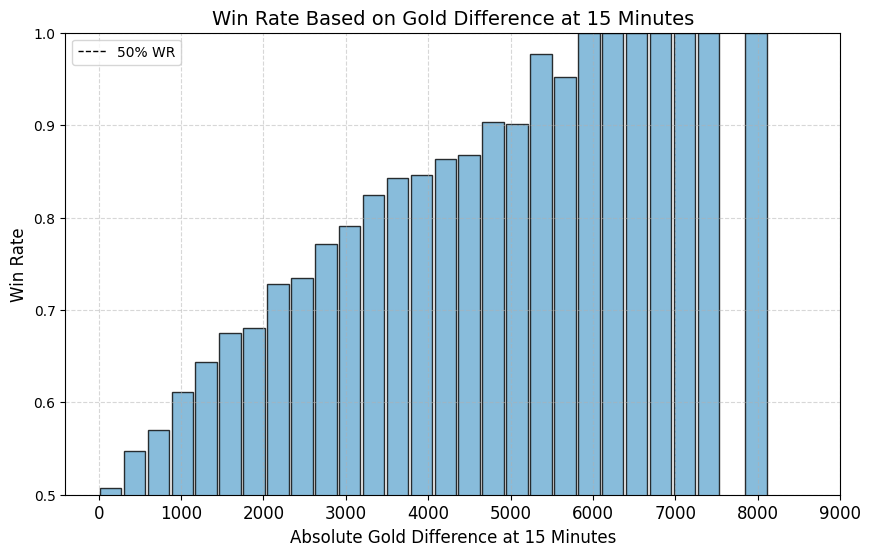

In [33]:
gold_diffs_abs = [abs(d["gold_diff"]) for d in gold_diffs]

# Define more bins for finer granularity
bins = np.linspace(0, max(gold_diffs_abs), 30)  # 10 bins from 0 to max gold difference

# Compute win rate per bin
# Compute win rates correctly by checking gold lead and corresponding winning team
win_rates = []
bin_centers = []

for i in range(len(bins) - 1):
    lower, upper = bins[i], bins[i + 1]
    in_bin = [d for d in gold_diffs if lower <= abs(d["gold_diff"]) < upper]

    if in_bin:
        wins = sum(1 for d in in_bin if (d["gold_diff"] > 0 and d["team_win"] == "blue") or (d["gold_diff"] < 0 and d["team_win"] == "red"))
        win_rate = (wins / len(in_bin))  # Win rate in percentage
    else:
        win_rate = 0  # Default to 0 if no data in bin
    
    bin_centers.append((lower + upper) / 2)
    
    win_rates.append(win_rate)

# Plot histogram of win rate vs. gold difference with corrected win rate calculation
plt.figure(figsize=(10, 6))
bars = plt.bar(bin_centers, [wr for wr in win_rates], width=(bins[1] - bins[0]) * 0.9, color="#6AABD2", edgecolor='black', alpha=0.8)

plt.ylim(0.5, 1)  # Linear scale for win rate
# Add a horizontal 50% WR reference line
plt.axhline(y=50, color='black', linestyle='dashed', linewidth=1, label="50% WR")
plt.xticks(range(0, 10000, 1000),fontsize=12)
plt.xlabel("Absolute Gold Difference at 15 Minutes", fontsize=12)
plt.ylabel("Win Rate", fontsize=12)
plt.title("Win Rate Based on Gold Difference at 15 Minutes", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

# Show the plot
plt.show()


Mean gold difference at 15 minutes: 100.87
Median gold difference at 15 minutes: 96.00
Standard deviation of gold difference at 15 minutes: 1696.53

Mean absolute gold difference at 15 minutes: 1349.71
Median absolute gold difference at 15 minutes: 1133.00
Standard deviation of absolute gold difference at 15 minutes: 1032.81


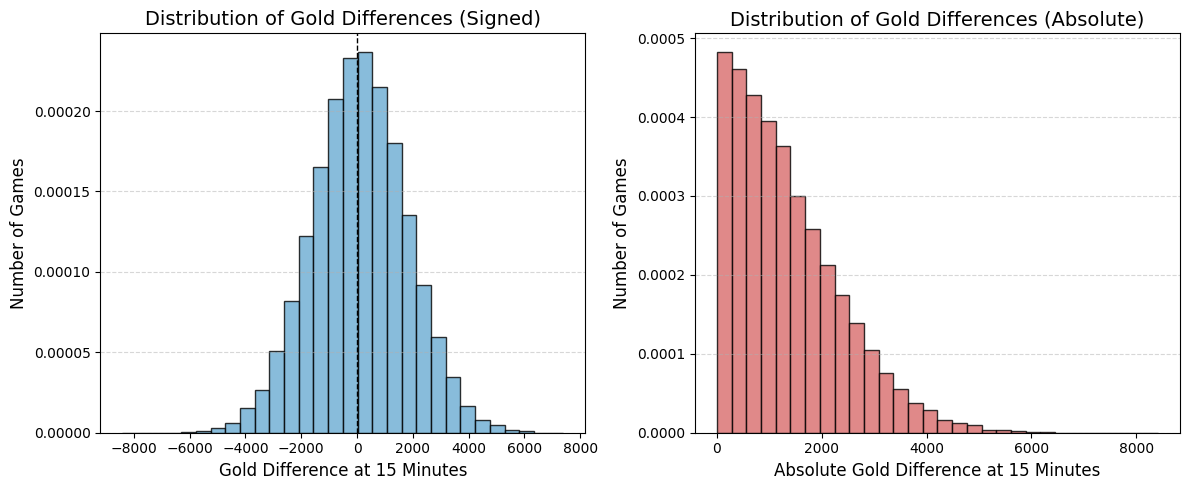

In [34]:
gold_diffs_vals = [d["gold_diff"] for d in gold_diffs]
gold_diffs_abs = [abs(d["gold_diff"]) for d in gold_diffs]

# Print summary statistics
print(f"Mean gold difference at 15 minutes: {np.mean(gold_diffs_vals):.2f}")
print(f"Median gold difference at 15 minutes: {np.median(gold_diffs_vals):.2f}")
print(f"Standard deviation of gold difference at 15 minutes: {np.std(gold_diffs_vals):.2f}")

# Print summary statistics for absolute gold differences
print(f"\nMean absolute gold difference at 15 minutes: {np.mean(gold_diffs_abs):.2f}")
print(f"Median absolute gold difference at 15 minutes: {np.median(gold_diffs_abs):.2f}")
print(f"Standard deviation of absolute gold difference at 15 minutes: {np.std(gold_diffs_abs):.2f}")

# Define number of bins
num_bins = 30

# Create figure with 2 subplots (2 cols, 1 row)
plt.figure(figsize=(12, 5))

# Plot histogram of raw (signed) gold differences
plt.subplot(1, 2, 1)
plt.hist(gold_diffs_vals, bins=num_bins, color="#6AABD2", edgecolor='black', alpha=0.8, density=True)
plt.xlabel("Gold Difference at 15 Minutes", fontsize=12)
plt.ylabel("Number of Games", fontsize=12)
plt.title("Distribution of Gold Differences (Signed)", fontsize=14)
plt.axvline(x=0, color='black', linestyle='dashed', linewidth=1)  # Reference line at 0
plt.grid(axis='y', linestyle="--", alpha=0.5)

# Plot histogram of absolute gold differences
plt.subplot(1, 2, 2)
plt.hist(gold_diffs_abs, bins=num_bins, color="#D96C6C", edgecolor='black', alpha=0.8, density=True)
plt.xlabel("Absolute Gold Difference at 15 Minutes", fontsize=12)
plt.ylabel("Number of Games", fontsize=12)
plt.title("Distribution of Gold Differences (Absolute)", fontsize=14)
plt.grid(axis='y', linestyle="--", alpha=0.5)

# Adjust layout for readability
plt.tight_layout()

In [35]:
for low, top in [(0, 500), (500, 1000), (1000, 2000), (2000, 3000), (3000, 4000), (4000, 5000), (6000, 10000)]:
    times = list(d["game_duration"] for d in gold_diffs if low <= abs(d["gold_diff"]) < top)
    
    print(f"Average game duration for gold difference between {low} and {top}: {np.mean(times):.2f}, Median: {np.median(times):.2f}, Std: {np.std(times):.2f} (n={len(times)})")

Average game duration for gold difference between 0 and 500: 27.94, Median: 27.91, Std: 6.04 (n=9230)
Average game duration for gold difference between 500 and 1000: 27.84, Median: 27.82, Std: 6.02 (n=8365)
Average game duration for gold difference between 1000 and 2000: 27.33, Median: 27.38, Std: 6.21 (n=12298)
Average game duration for gold difference between 2000 and 3000: 26.41, Median: 26.58, Std: 6.39 (n=6290)
Average game duration for gold difference between 3000 and 4000: 24.92, Median: 24.90, Std: 6.60 (n=2307)
Average game duration for gold difference between 4000 and 5000: 22.75, Median: 22.03, Std: 6.41 (n=625)
Average game duration for gold difference between 6000 and 10000: 18.25, Median: 16.60, Std: 3.89 (n=21)


In [38]:
pipeline = [
    { "$match": { "result.gameDuration": { "$gt": 900 } } },  # Filter games longer than 15 min
    { "$group": { 
        "_id": None,
        "totalTeamKills": { 
            "$sum": { 
                "$add": [
                    "$result.teams.blue.objectives.champion.kills", 
                    "$result.teams.red.objectives.champion.kills"
                ] 
            } 
        },
        "averageTeamKills": { 
            "$avg": { 
                "$add": [
                    "$result.teams.blue.objectives.champion.kills", 
                    "$result.teams.red.objectives.champion.kills"
                ] 
            } 
        }
    }}
]

result = collection.aggregate(pipeline)
result = await result.next()
total_team_kills = result["totalTeamKills"]
average_team_kills = result["averageTeamKills"]
print(f"Total team kills: {total_team_kills}, Average team kills: {average_team_kills:.2f}")

Total team kills: 2112701, Average team kills: 53.82


In [2]:
minutes = list(range(61))
async def get_result_data(champions, key):
    champion_games_data = {champ: [] for champ in champions}
    all_games = []
    async for game in collection.find({}):
        game_duration_sec = game["result"]["gameDuration"]
        game_duration_min = round(game_duration_sec / 60)  # Use floor division for integer minutes
        
        # Merge participants from blue and red teams
        blue_participants = game["result"]["teams"]["blue"]["participants"]
        red_participants = game["result"]["teams"]["red"]["participants"]
        participants = blue_participants + red_participants
        
        for p in participants:
            champ = p.get("championName")
            total = p.get(key, 0)
            if champ in champions:
                champion_games_data[champ].append((game_duration_min, total))
                
            all_games.append((game_duration_min, total))
                
    
    champion_avg = {}  # Will map champion -> list of average healing values per minute
    avg = {}

    for champ, games in champion_games_data.items():
        avg_per_min = []
        for m in minutes:
            # Sum total healing for games that lasted exactly m minutes
            total = sum(push for duration, push in games if duration == m)
            # Count number of games with duration m
            num_games = sum(1 for duration, _ in games if duration == m)
            avg = total / num_games if num_games > 0 else 0
            avg_per_min.append(avg)
        champion_avg[champ] = avg_per_min

    all_avg_per_min = []
    for m in minutes:
        # Sum total healing for games that lasted exactly m minutes
        total = sum(push for duration, push in all_games if duration == m)
        # Count number of games with duration m
        num_games = sum(1 for duration, _ in all_games if duration == m)
        avg = total / num_games if num_games > 0 else 0
        all_avg_per_min.append(avg)
        
    return champion_avg, all_avg_per_min

In [47]:
import numpy as np
healing_champions = ["Soraka", "Aatrox", "DrMundo", "Yuumi",
                     "Sona", "Vladimir", "Kayn", "Seraphine", 
                     "Zac", "Olaf", "Swain", "TahmKench",
                     "Draven", "Aphelios", "Samira", "Nilah",
                     "Taric", "Nami", "Sylas"]
champion_avg_heal, all_avg_heal_per_min  = await get_result_data(healing_champions, "totalHeal")

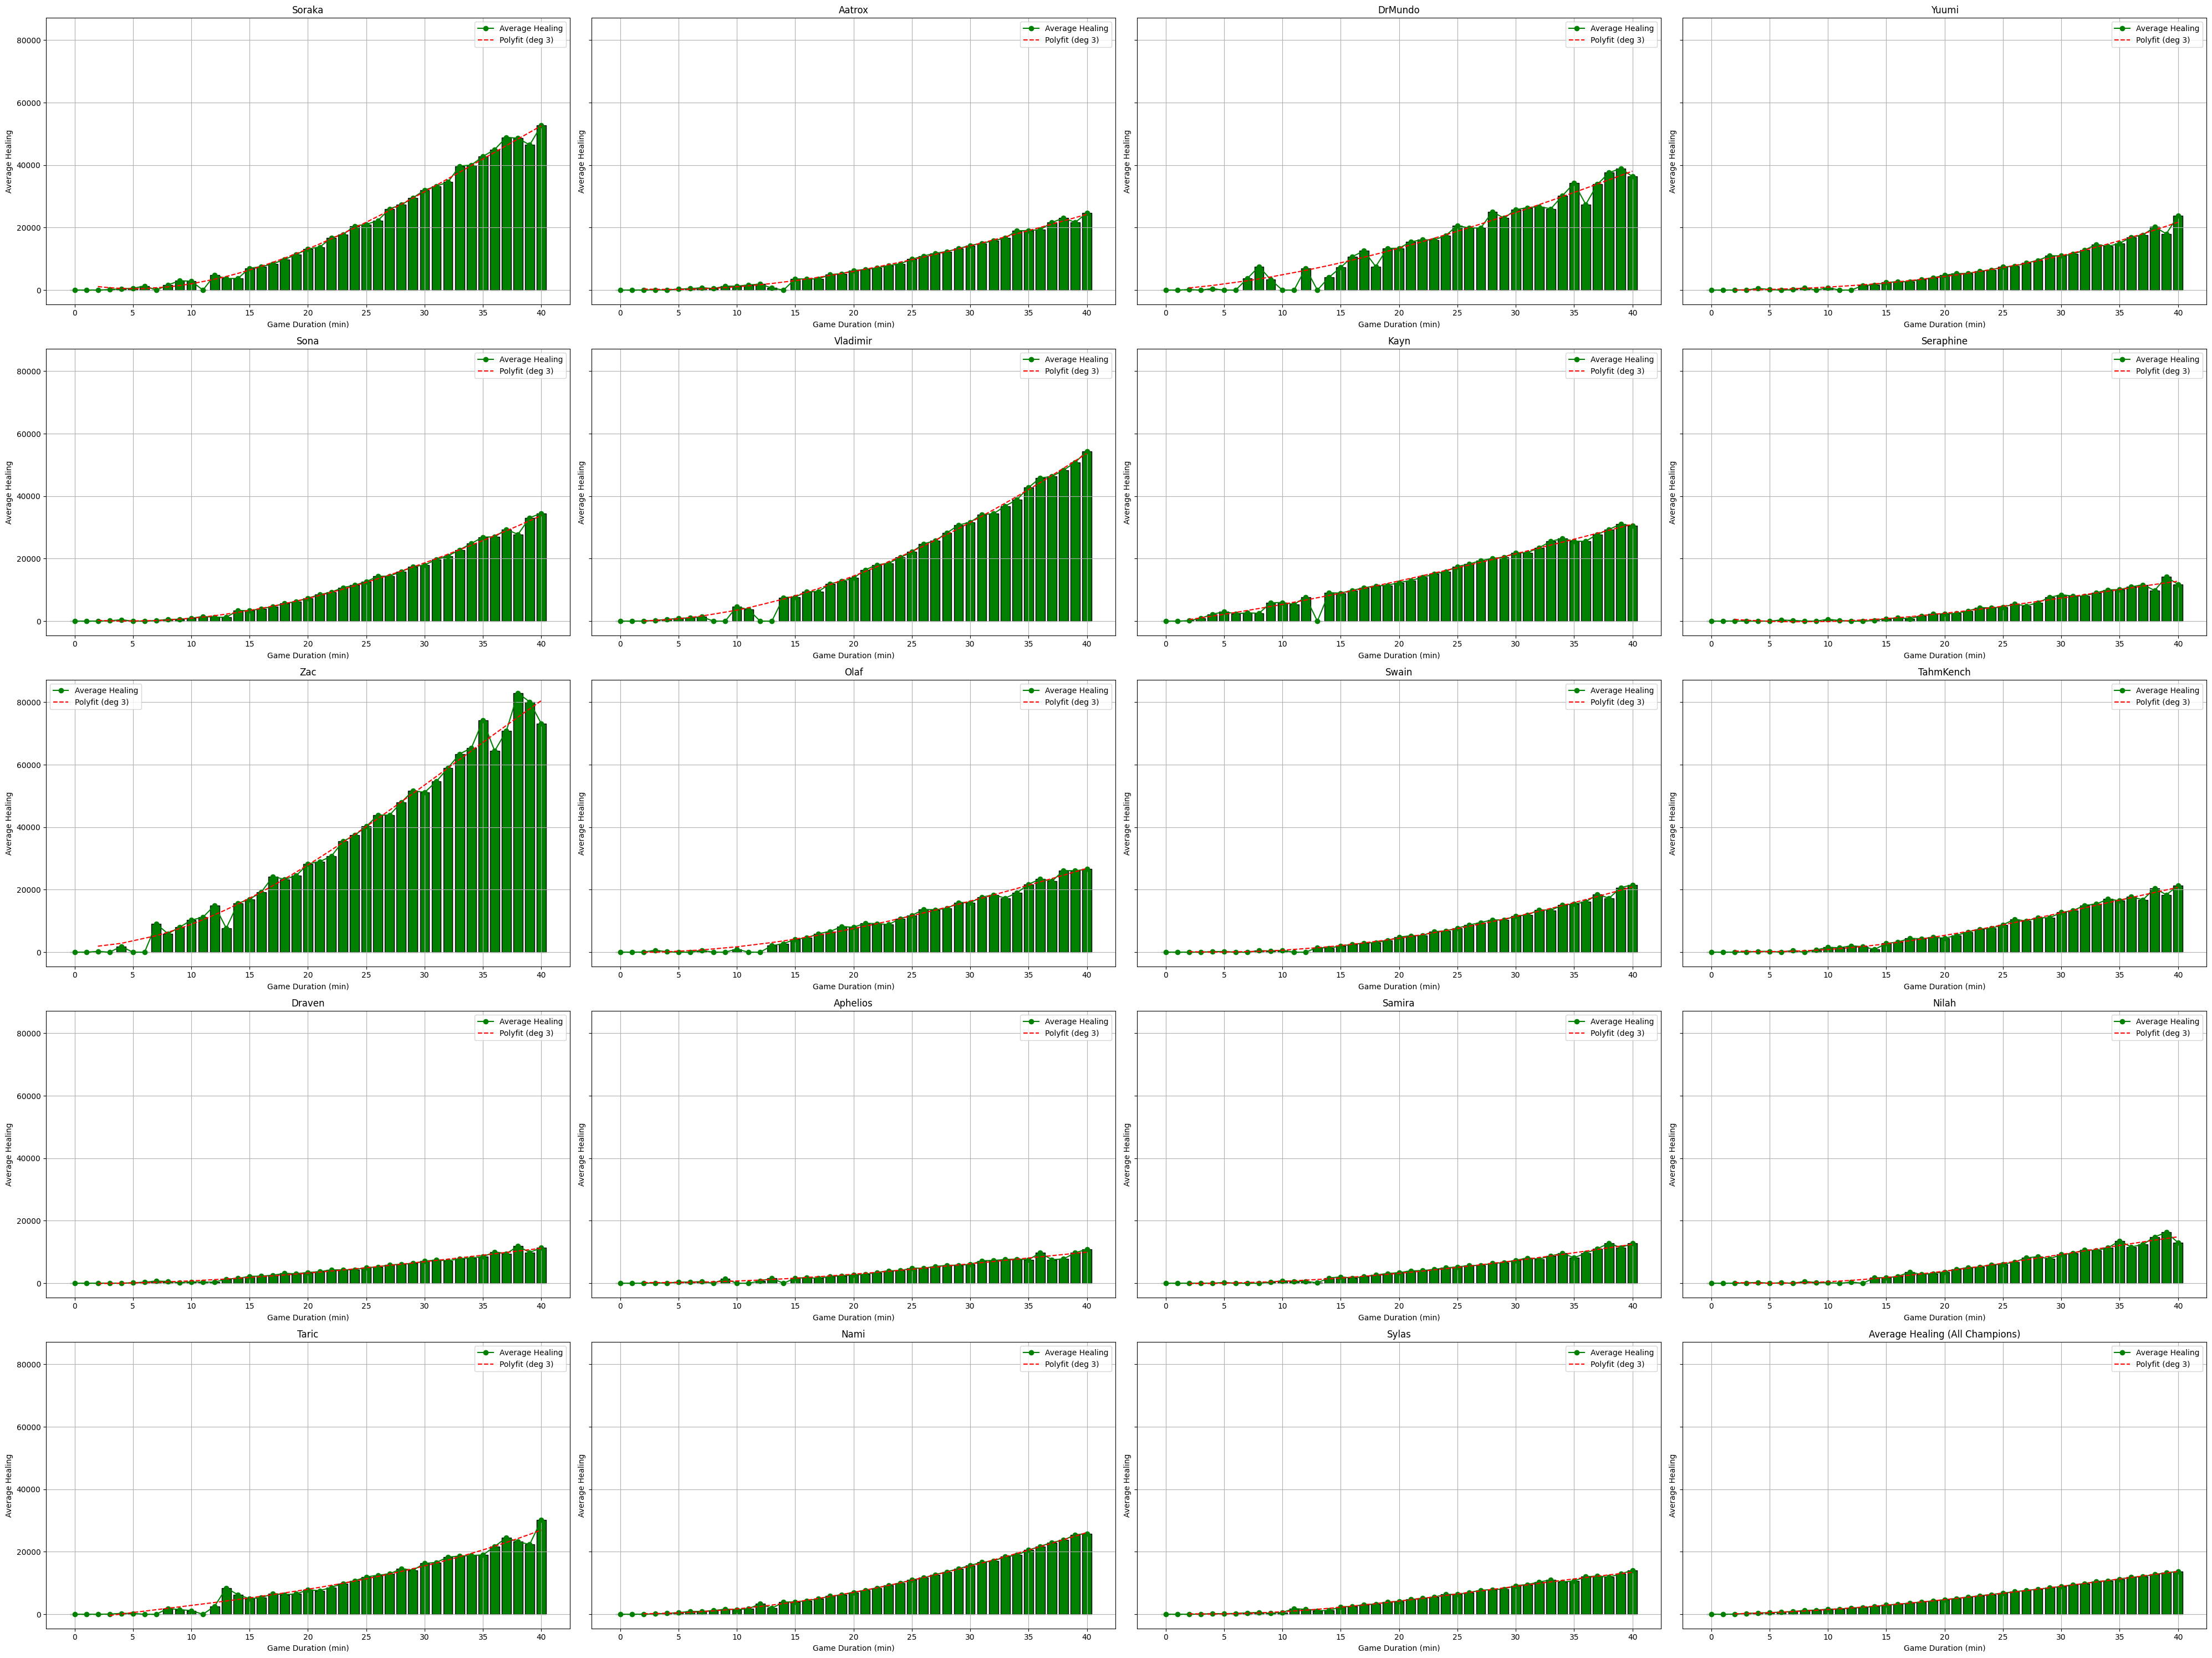

In [53]:
fig, axs = plt.subplots(5, 4, figsize=(40, 30), sharey=True)
axs = axs.flatten()
t = 40

for idx, champ in enumerate(healing_champions):
    ax = axs[idx]
    ax.set_title(champ)
    ax.set_xlabel("Game Duration (min)")
    ax.set_ylabel("Average Healing")
    ax.set_xticks(range(0, 61, 5))  # Label every 5 minutesfor idx, champ in enumerate(champions):
    ax = axs[idx]
    x = np.array(list(minutes))
    y = np.array(champion_avg_heal[champ])
    x_mask = (x <= t)
    x = x[x_mask]
    y = y[x_mask]
    # Plot the discrete points as a line
    ax.bar(x, y, color='green', edgecolor='black')
    ax.plot(x, y, 'o-', color='green', label='Average Healing')

    # Optional: Fit a polynomial to see a smooth curve (degree 2 or 3 are common choices)
    # Filter out zero or missing data so polyfit doesn’t break
    valid_mask = (y > 0)
    x_valid = x[valid_mask]
    y_valid = y[valid_mask]
    if len(x_valid) > 3:  # Need more data points than polynomial degree
        poly_degree = 3
        coeffs = np.polyfit(x_valid, y_valid, deg=poly_degree)
        poly_vals = np.polyval(coeffs, x_valid)
        ax.plot(x_valid, poly_vals, 'r--', label=f'Polyfit (deg {poly_degree})')
    
    ax.set_title(champ)
    ax.set_xlabel("Game Duration (min)")
    ax.set_ylabel("Average Healing")
    ax.legend()
    ax.grid(True)
    

ax = axs[19]
ax.set_title(champ)
ax.set_xlabel("Game Duration (min)")
ax.set_ylabel("Average Healing")
ax.set_xticks(range(0, 61, 5))  # Label every 5 minutesfor idx, champ in enumerate(champions):
ax = axs[19]
x = np.array(list(minutes))
y = np.array(all_avg_heal_per_min)
x_mask = (x <= t)
x = x[x_mask]
y = y[x_mask]

ax.bar(x, y, color='green', edgecolor='black')

# Plot the discrete points as a line
ax.plot(x, y, 'o-', color='green', label='Average Healing')

# Optional: Fit a polynomial to see a smooth curve (degree 2 or 3 are common choices)
# Filter out zero or missing data so polyfit doesn’t break
valid_mask = (y > 0)
x_valid = x[valid_mask]
y_valid = y[valid_mask]
if len(x_valid) > 3:  # Need more data points than polynomial degree
    poly_degree = 3
    coeffs = np.polyfit(x_valid, y_valid, deg=poly_degree)
    poly_vals = np.polyval(coeffs, x_valid)
    ax.plot(x_valid, poly_vals, 'r--', label=f'Polyfit (deg {poly_degree})')

ax.set_title("Average Healing (All Champions)")
ax.set_xlabel("Game Duration (min)")
ax.set_ylabel("Average Healing")
ax.legend()
ax.grid(True)

plt.tight_layout()

In [3]:
import math
from matplotlib.figure import Figure, Axes
import re
def normilize_data(data, x, t=40):
    x = np.array(x)
    x_mask = (x <= t)
    x = x[x_mask]
    y_raw = np.array(data)
    y_raw = y_raw[x_mask]
    y_norm = y_raw / np.max(y_raw)  # Normalize to max value for better comparison
    return x, y_norm

def plot_champion_histograms(champions_data, all_data, champions: list[str], minutes: list[int], key: str, color="green", t=40, poly_degree=3):    
    if len(champions) > 8:
        print("Too many champions to plot. Please limit to 9 or fewer.")
        return
    cols, rows = 3, math.ceil((len(champions) + 1) / 3)
    key = re.sub(r'((?<=[a-z])[A-Z]|(?<!\A)[A-Z](?=[a-z]))', r' \1', key)
    _, axs = plt.subplots(rows, cols, figsize=(12, 12), sharey=True)
    axs = axs.flatten()
    for idx, champ in enumerate(champions):
        ax: Axes = axs[idx]
        x, y = normilize_data(champions_data[champ], x=minutes, t=t)
        ax.set_title(champ)
        ax.set_xlabel("Game Duration (min)")
        ax.set_ylabel(f"Average {key.title()}")
        ax.set_xticks(range(0, 61, 5))  # Label every 5 minutesfor idx, champ in enumerate(champions):
                
        ax.bar(x, y, color=color, edgecolor='black')        
        ax.plot(x, y, 'o-', color=color, label=f'Average {key.title()}')

        # Optional: Fit a polynomial to see a smooth curve (degree 2 or 3 are common choices)
        # Filter out zero or missing data so polyfit doesn’t break
        valid_mask = (y > 0)
        x_valid = x[valid_mask]
        y_valid = y[valid_mask]
        if len(x_valid) > 3:  # Need more data points than polynomial degree
            coeffs = np.polyfit(x_valid, y_valid, deg=poly_degree)
            poly_vals = np.polyval(coeffs, x_valid)
            ax.plot(x_valid, poly_vals, 'r--', label=f'Polyfit (deg {poly_degree})')
        
        ax.set_title(champ)
        ax.set_xlabel("Game Duration (min)")
        ax.set_ylabel(f"Average {key.title()}")
        ax.legend()
        ax.grid(True)
        

    ax = axs[idx + 1]
    x, y = normilize_data(all_data, minutes, t)
    
    ax.set_title(champ)
    ax.set_xlabel("Game Duration (min)")
    ax.set_ylabel(f"Average {key.title()}")
    ax.set_xticks(range(0, 61, 5))  # Label every 5 minutesfor idx, champ in enumerate(champions):

    # Plot the discrete points as a line
    ax.bar(x, y, color=color, edgecolor='black')
    ax.plot(x, y, 'o-', color=color, label=f'Average {key.title()}')

    # Optional: Fit a polynomial to see a smooth curve (degree 2 or 3 are common choices)
    # Filter out zero or missing data so polyfit doesn’t break
    valid_mask = (y > 0)
    x_valid = x[valid_mask]
    y_valid = y[valid_mask]
    if len(x_valid) > 3:  # Need more data points than polynomial degree
        coeffs = np.polyfit(x_valid, y_valid, deg=poly_degree)
        poly_vals = np.polyval(coeffs, x_valid)
        ax.plot(x_valid, poly_vals, 'r--', label=f'Polyfit (deg {poly_degree})')

    ax.set_title(f"{key.title()} (All Champions)")
    ax.set_xlabel("Game Duration (min)")
    ax.set_ylabel(f"Average {key.title()}")
    ax.legend()
    ax.grid(True)

    plt.tight_layout()
    
champions_to_plot = ["Soraka", "Aatrox", "DrMundo", 
                     "Vladimir", "Kayn", "Seraphine", 
                     "Nilah", "Zac"]
plot_champion_histograms(champion_avg_heal, all_avg_heal_per_min, champions_to_plot, minutes, key="totalHeal", t=40, poly_degree=3)

NameError: name 'champion_avg_heal' is not defined

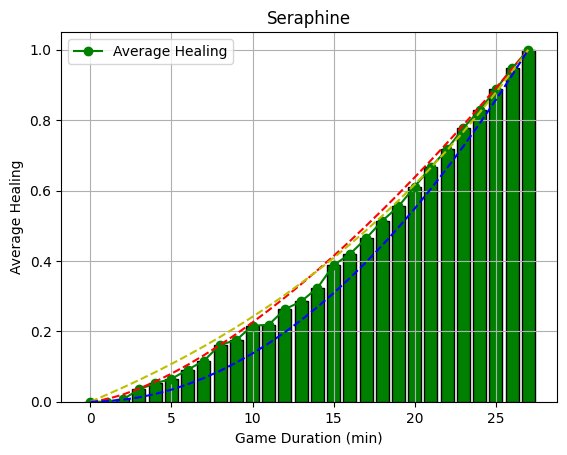

In [252]:
champ="Seraphine"
# champ = "All Champions"
# y_raw = np.array()
x, y = normilize_data(champion_avg_heal[champ], minutes, t=40)
t = 27
x, y = normilize_data(all_avg_heal_per_min, minutes, t=27)
b = 0.08 *(15/t)

plt.bar(x, y, color='green', edgecolor='black')
# ax.bar(minutes, champion_avg_heal[champ], color='green', edgecolor='black')
plt.title(champ)
plt.xlabel("Game Duration (min)")
plt.ylabel("Average Healing")
plt.xticks(range(0, 45, 5))  # Label every 5 minutesfor idx, champ in enumerate(champions):
# Plot the discrete points as a line
plt.plot(x, y, 'o-', color='green', label='Average Healing')

def exponential_fit_1(x, y_k, t_k, B):
    return y_k * (np.exp(B * x) - 1) / (np.exp(B * t_k) - 1)

def quadratic_fit_1(x, y_k, t_k):
    return (y_k / (t_k**2)) * x**2

def xsqrtx(x, y_k, t_k, b):
    return x * np.sqrt(x) /(t_k * np.sqrt(t_k))

plt.plot(x, xsqrtx(x, y[t], t, b), 'r--')
plt.plot(x, exponential_fit_1(x, y[t], t, b), 'y--')
plt.plot(x, quadratic_fit_1(x, y[t], t), 'b--')

plt.legend()
plt.grid(True)

NSqrt:
  Params = [0.00395065]
  R^2    = 0.9987481220121186



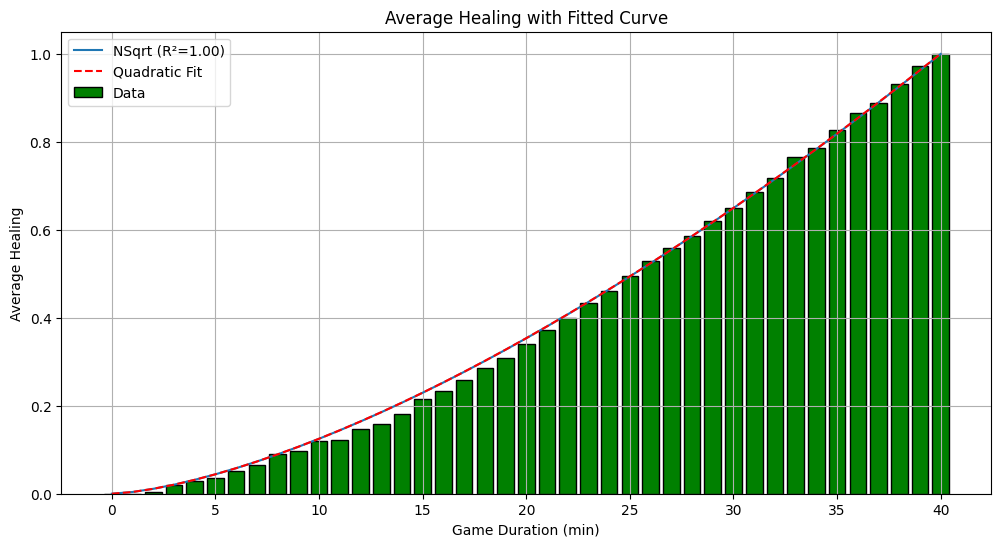

In [253]:
from scipy.optimize import curve_fit

t = 40
x, y = normilize_data(all_avg_heal_per_min, minutes, t=t)

# x_mask = (x > 10)
# x = x[x_mask]
# y = y[x_mask]
# Define candidate functions
def linear(t, b):
    return b * t

def quadratic(t, b, c):
    return c * (t - b)**2


def cubic(t, b, c, d):
    return b * t + c * t**2 + d * t**3

def nsqrt(t, b):
    return b * t * np.sqrt(t)

def exponential(t, a, b):
    # a * e^(b * t)
    return a * (np.exp(b * t) - 1)

def nlogn(t, a):
    return a * t * np.log(b * t)

def logistic(t, L, k, t0):
    return L / (1 + np.exp(-k * (t - t0)))

def gompertz(t, L, k, t0):
    return L * np.exp(-np.exp(-k * (t - t0)))

def tanh_curve(t, L, k):
    return L * np.tanh(k * t)

def logistic_linear(t, L, k, t0, m):
    return (L / (1 + np.exp(-k * (t - t0)))) + (m * t)

def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (ss_res / ss_tot)

models = {
    # "Linear":      (linear,     [1]),      # initial guess: b=1
    # "Quadratic":   (quadratic,  [1/40, 1/40]),   # initial guess: b=1, c=1
    # "Cubic":   (cubic,  [1, 1, 1]),   # initial guess: b=1, c=1, d=1
    # "NLogN": (nlogn, [1]),  # initial guess: a=1, b=1
    "NSqrt": (nsqrt, [1]),  # initial guess: a=1, b=1
    # "Exponential": (exponential,[1000, 0.05]), # guess a=1000, b=0.05 (tweak if needed)
    # "Logistic Sigmoid": (logistic, [1, 1, 0.5]),  # Initial guess: L=1, k=1, t0=0.5
    # "Gompertz": (gompertz, [1, 1, 0.5]),
    # "Hyperbolic Tangent (Tanh)": (tanh_curve, [1, 1]),
}

results = {}

for name, (model_func, p0) in models.items():
    try:
        popt, pcov = curve_fit(model_func, x, y, p0=p0, maxfev=10000)
        # Predict using the fitted parameters
        y_fit = model_func(x, *popt)
        # Compute R²
        r2 = r_squared(y, y_fit)
        results[name] = (popt, r2)
    except RuntimeError:
        # If curve_fit fails to converge
        results[name] = ("Fit failed", None)

# Print results
plt.figure(figsize=(12, 6))
plt.bar(x, y, color='green', edgecolor='black', label='Data')
for name, (params, r2) in results.items():
    print(f"{name}:")
    print(f"  Params = {params}")
    print(f"  R^2    = {r2}\n")
    if r2 is not None:
        plt.plot(x, models[name][0](x, *params), label=f"{name} (R²={r2:.2f})")

plt.plot(x, nsqrt(x, 1/(t*np.sqrt(t))), 'r--', label='Quadratic Fit')

plt.xlabel("Game Duration (min)")
plt.ylabel("Average Healing")
plt.title("Average Healing with Fitted Curve")
plt.legend()
plt.grid(True)
plt.show()




In [92]:
import numpy as np
shielding_champions = ["Lulu", "Janna", "Yuumi", "Milio",
                     "Ivern", "Sona", "Karma", "Seraphine"]
champion_avg_shield, all_avg_shield_per_min  = await get_result_data(shielding_champions, "totalDamageShieldedOnTeammates")

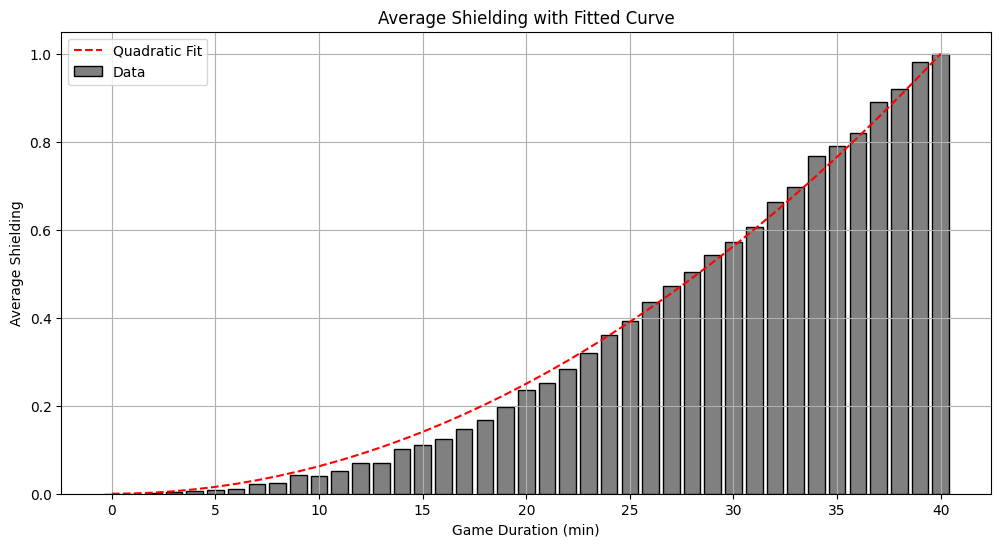

In [236]:
from scipy.optimize import curve_fit
t = 40
x, y = normilize_data(all_avg_shield_per_min, minutes, t=t)
# x_mask = (x > 10)
# x = x[x_mask]
# y = y[x_mask]
# Define candidate functions
def linear(t, b):
    return b * t

def quadratic(t, c):
    return c * t**2


def cubic(t, b, c, d):
    return b * t + c * t**2 + d * t**3

def exponential(t, a, b):
    # a * e^(b * t)
    return a * (np.exp(b * t) - 1)

def logistic(t, L, k, t0):
    return L / (1 + np.exp(-k * (t - t0)))

def gompertz(t, L, k, t0):
    return L * np.exp(-np.exp(-k * (t - t0)))

def tanh_curve(t, L, k):
    return L * np.tanh(k * t)

def logistic_linear(t, L, k, t0, m):
    return (L / (1 + np.exp(-k * (t - t0)))) + (m * t)

def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (ss_res / ss_tot)

models = {
    # "Linear":      (linear,     [1]),      # initial guess: b=1
    # "Quadratic":   (quadratic,  [1]),   # initial guess: b=1, c=1
    # "Cubic":   (cubic,  [1, 1, 1]),   # initial guess: b=1, c=1, d=1
    # "Exponential": (exponential,[1000, 0.05]), # guess a=1000, b=0.05 (tweak if needed)
    # "Logistic Sigmoid": (logistic, [1, 1, 0.5]),  # Initial guess: L=1, k=1, t0=0.5
    # "Gompertz": (gompertz, [1, 1, 0.5]),
    # "Hyperbolic Tangent (Tanh)": (tanh_curve, [1, 1]),
}

results = {}

for name, (model_func, p0) in models.items():
    try:
        popt, pcov = curve_fit(model_func, x, y, p0=p0, maxfev=10000)
        # Predict using the fitted parameters
        y_fit = model_func(x, *popt)
        # Compute R²
        r2 = r_squared(y, y_fit)
        results[name] = (popt, r2)
    except RuntimeError:
        # If curve_fit fails to converge
        results[name] = ("Fit failed", None)

# Print results
plt.figure(figsize=(12, 6))
plt.bar(x, y, color='grey', edgecolor='black', label='Data')
for name, (params, r2) in results.items():
    print(f"{name}:")
    print(f"  Params = {params}")
    print(f"  R^2    = {r2}\n")
    if r2 is not None:
        plt.plot(x, models[name][0](x, *params), label=f"{name} (R²={r2:.2f})")
        
plt.plot(x, (1/(40*40)) * x**2, 'r--', label='Quadratic Fit')

plt.xlabel("Game Duration (min)")
plt.ylabel("Average Shielding")
plt.title("Average Shielding with Fitted Curve")
plt.legend()
plt.grid(True)
plt.show()


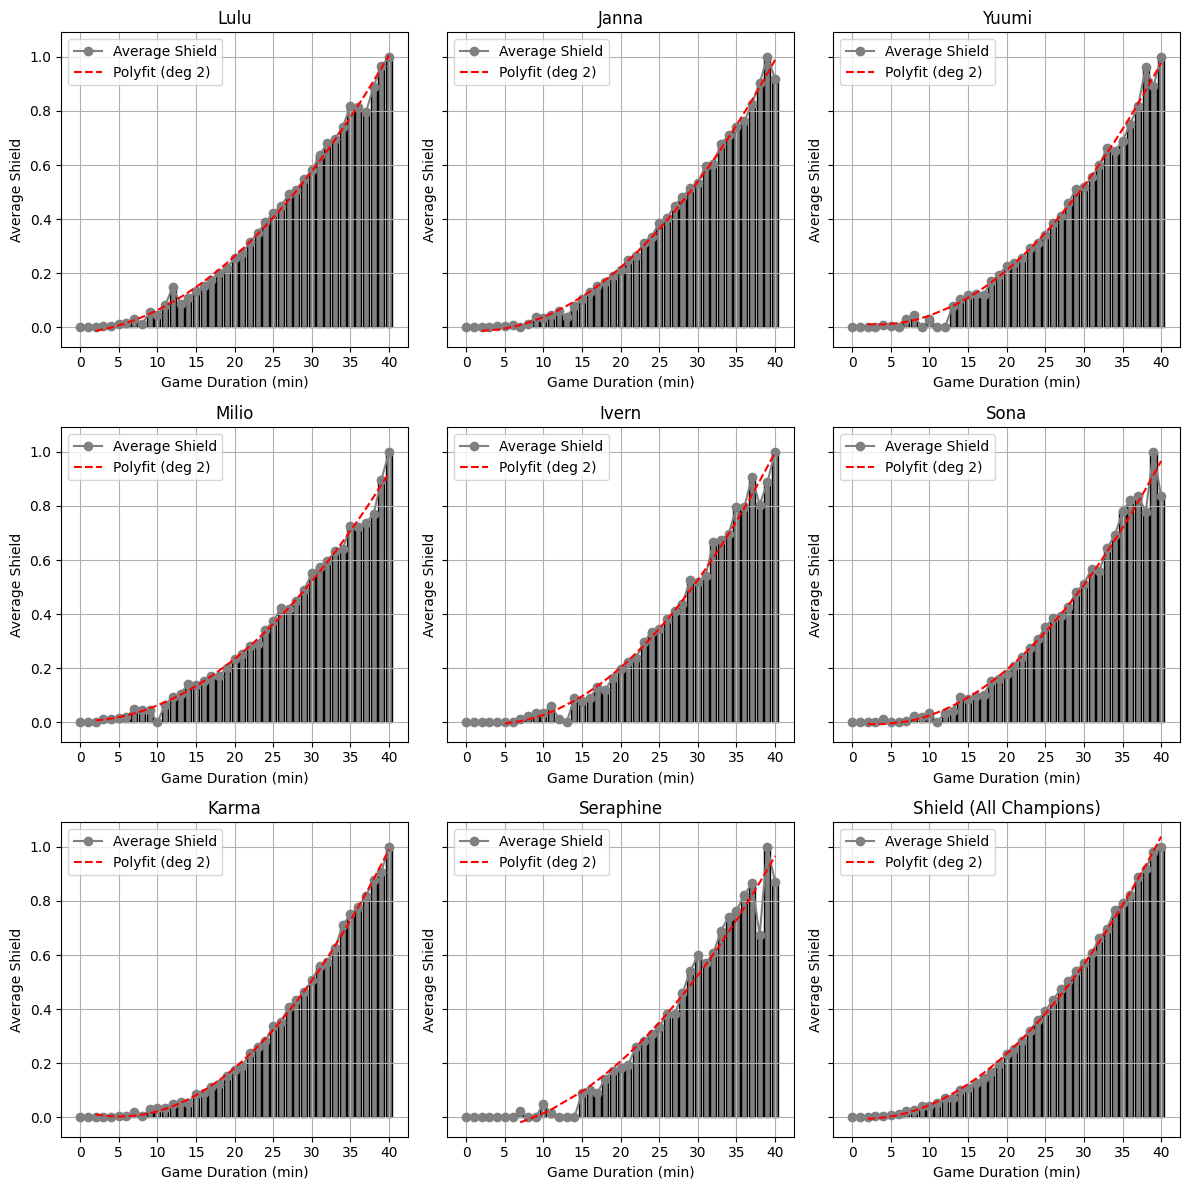

In [107]:
plot_champion_histograms(champion_avg_shield, all_avg_shield_per_min, shielding_champions, minutes, key="Shield", t=40, color="grey")

In [4]:
import numpy as np
pushing_champions = ["Yorick", "Camille", "Sion", "Garen", "DrMundo"]

champion_avg_push, all_avg_push_per_min  = await get_result_data(pushing_champions, "damageDealtToBuildings")



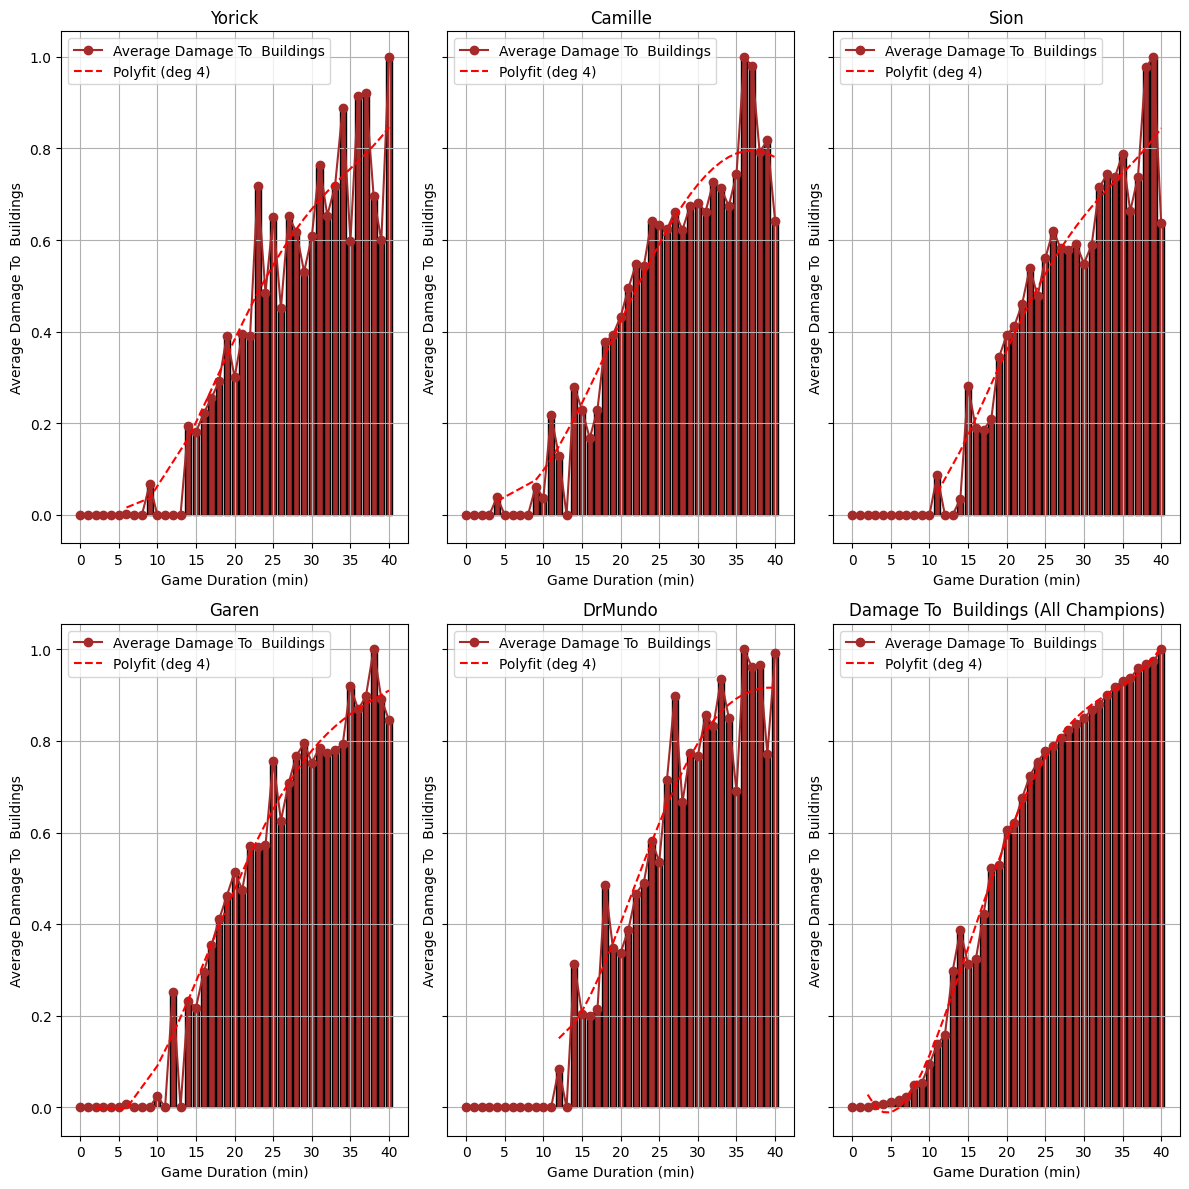

In [5]:
plot_champion_histograms(champion_avg_push, all_avg_push_per_min, pushing_champions, minutes, key="Damage to Buildings", t=40, color="brown", poly_degree=4)

Piecewise:
  Params = [ 1.00000000e+01  4.80447908e-03 -6.16377392e-03  1.40806091e-03
 -2.50093596e+00  6.77579256e-01  4.64101080e+00]
  R^2    = 0.9910717381844082

Piecewise Fit:
  R^2    = 0.9878246862060646



C:\Users\Melzak\AppData\Local\Temp\ipykernel_20408\3026083633.py:44: RuntimeWarning: divide by zero encountered in log
  b0 + b1*np.log(b2*x))
C:\Users\Melzak\AppData\Local\Temp\ipykernel_20408\3026083633.py:44: RuntimeWarning: invalid value encountered in log
  b0 + b1*np.log(b2*x))
C:\Users\Melzak\AppData\Local\Temp\ipykernel_20408\3026083633.py:67: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(model_func, x, y, p0=p0, maxfev=10000)
C:\Users\Melzak\AppData\Local\Temp\ipykernel_20408\3026083633.py:93: RuntimeWarning: divide by zero encountered in log
  np.log(a * x / t0) / np.log(a * t1 / t0))


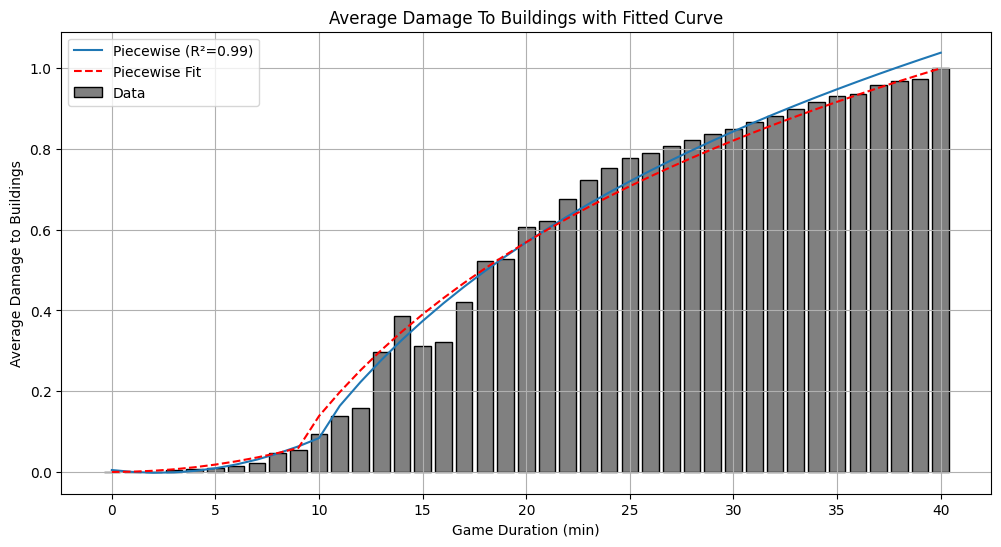

In [51]:
from scipy.optimize import curve_fit
t = 40
x, y = normilize_data(all_avg_push_per_min, minutes, t=t)

# x_mask = (x > 7)
# x = x[x_mask]
# y = y[x_mask]
# Define candidate functions
def linear(t, b):
    return b * t

def quadratic(t, c):
    return c * t**2

def logarithmic(t, a, b, c, d):
    return a * np.log(b * t + c) + d

def cubic(t, b, c, d):
    return b * t + c * t**2 + d * t**3

def exponential(t, a, b):
    # a * e^(b * t)
    return a * (np.exp(b * t) - 1)

def logistic(t, L, k, t0):
    return L / (1 + np.exp(-k * (t - t0)))

def gompertz(t, L, k, t0):
    return L * np.exp(-np.exp(-k * (t - t0)))

def tanh_curve(t, L, k):
    return L * np.tanh(k * t)

def logistic_linear(t, L, k, t0, m):
    return (L / (1 + np.exp(-k * (t - t0)))) + (m * t)

def piecewise_func(x, x0, a0, a1, a2, b0, b1, b2):
    # p(x) = a0 + a1*x + a2*x^2 (for x <= x0)
    # q(x) = b0 + b1*np.log(x)  (for x > x0)
    # We'll force continuity at x0 by adjusting parameters in the fit or
    # by a separate condition. For simplicity, here's a naive version:
    return np.where(x <= x0,
                    a0 + a1*x + a2*x**2,
                    b0 + b1*np.log(b2*x))

def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (ss_res / ss_tot)

models = {
    # "Linear":      (linear,     [1]),      # initial guess: b=1
    # "Quadratic":   (quadratic,  [1]),   # initial guess: b=1, c=1
    # "Cubic":   (cubic,  [1, 1, 1]),   # initial guess: b=1, c=1, d=1
    "Piecewise": (piecewise_func, [10, 1, 1, 1, 1, 1, 1]),  # Initial guess: a0=1, a1=1, a2=1, b0=1, b1=1
    # "Logarithmic": (logarithmic, [1, 1, 1, 1]), # guess a=1000, b=0.05 (tweak if needed)
    # "Exponential": (exponential,[1000, 0.05]), # guess a=1000, b=0.05 (tweak if needed)
    # "Logistic Sigmoid": (logistic, [1, 1, 0.5]),  # Initial guess: L=1, k=1, t0=0.5
    # "Gompertz": (gompertz, [1, 1, 0.5]),
    # "Hyperbolic Tangent (Tanh)": (tanh_curve, [1, 1]),
}

results = {}

for name, (model_func, p0) in models.items():
    try:
        popt, pcov = curve_fit(model_func, x, y, p0=p0, maxfev=10000)
        # Predict using the fitted parameters
        y_fit = model_func(x, *popt)
        # Compute R²
        r2 = r_squared(y, y_fit)
        results[name] = (popt, r2)
    except RuntimeError:
        # If curve_fit fails to converge
        results[name] = ("Fit failed", None)

# Print results
plt.figure(figsize=(12, 6))
plt.bar(x, y, color='grey', edgecolor='black', label='Data')
for name, (params, r2) in results.items():
    print(f"{name}:")
    print(f"  Params = {params}")
    print(f"  R^2    = {r2}\n")
    if r2 is not None:
        plt.plot(x, models[name][0](x, *params), label=f"{name} (R²={r2:.2f})")

def func(x, t0, t1):
    a = 1.25
    val = np.log(a * (t0-1)/t0) / np.log(a*t1 / t0)
    a2 = val / ((t0)**2)
    return np.where(x <= t0-1,
                    a2*x**2,
                    np.log(a * x / t0) / np.log(a * t1 / t0))
zp = 10
plt.plot(x, func(x, zp, t), 'r--', label='Piecewise Fit')
r2 = r_squared(y, func(x, zp, t))
print(f"Piecewise Fit:")
print(f"  R^2    = {r2}\n")
plt.xlabel("Game Duration (min)")
plt.ylabel("Average Damage to Buildings")
plt.title("Average Damage To Buildings with Fitted Curve")
plt.legend()
plt.grid(True)
plt.show()


In [140]:
import numpy as np
pushing_champions = ["Yorick", "Zyra", "MasterYi", "Nunu", "Trundle"]

champion_avg_obj, all_avg_push_per_obj  = await get_result_data(pushing_champions, "damageDealtToObjectives")

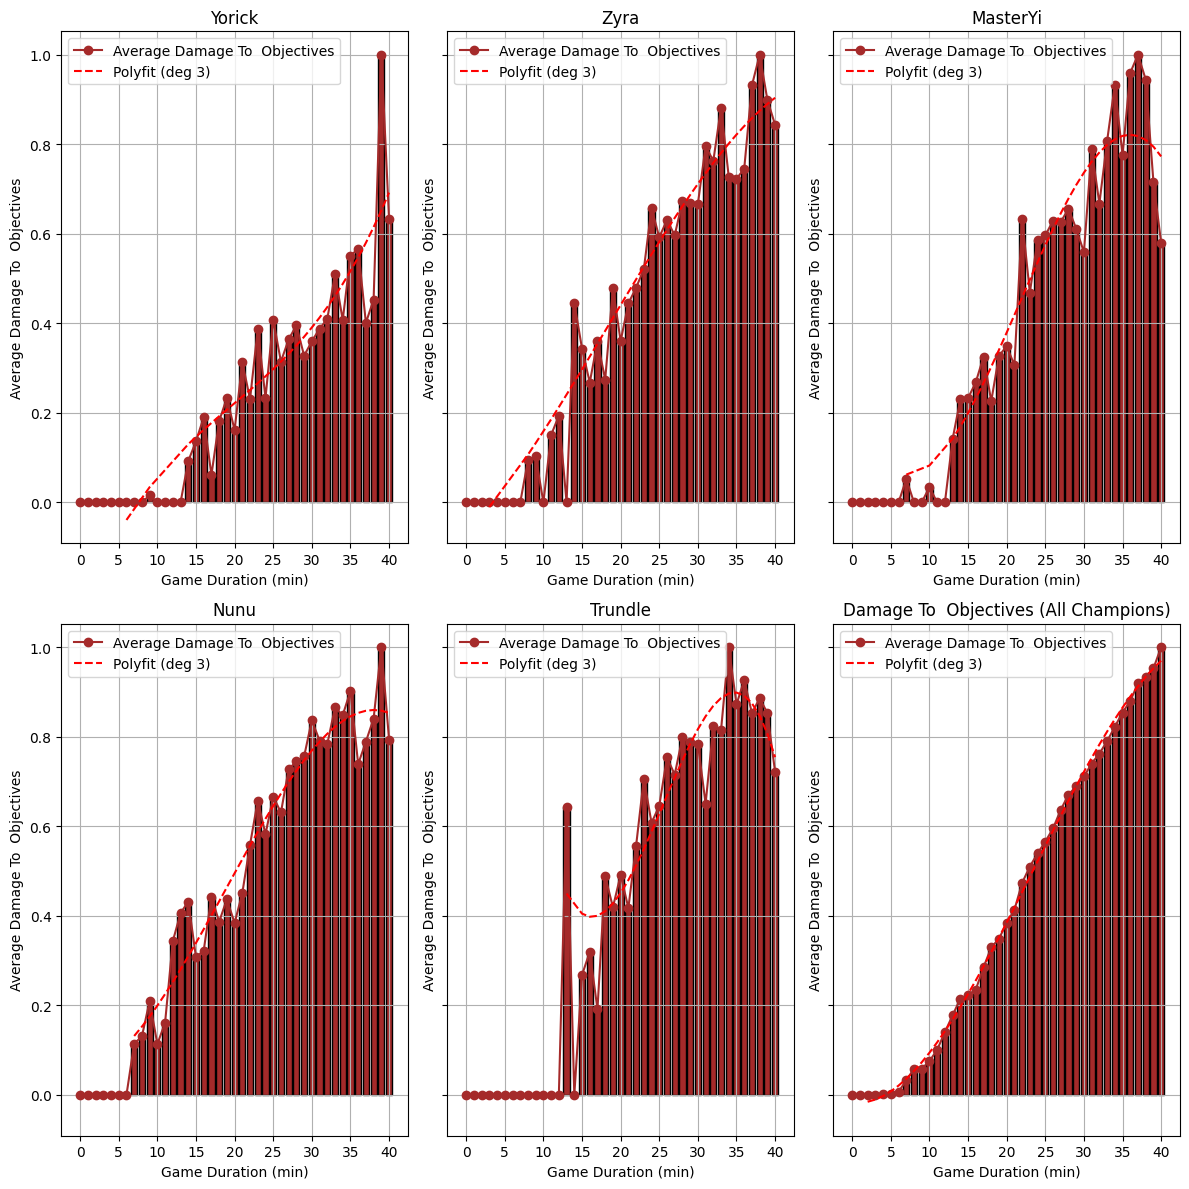

In [141]:
plot_champion_histograms(champion_avg_obj, all_avg_push_per_obj, pushing_champions, minutes, key="Damage to Objectives", t=40, color="brown")

Linear:
  Params = [ 0.02785008 -0.13906665]
  R^2    = 0.9817459488238249



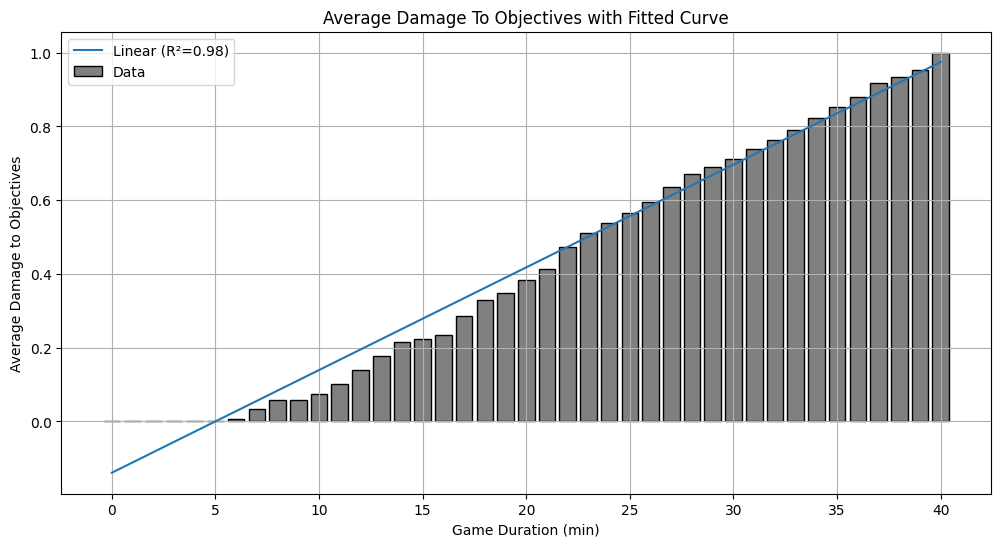

In [263]:
from scipy.optimize import curve_fit
t = 40
x, y = normilize_data(all_avg_push_per_obj, minutes, t=t)

# x_mask = (x > 5)
# x = x[x_mask]
# y = y[x_mask]
# Define candidate functions
def linear(t, b, a):
    return b * t + a

def quadratic(t, c):
    return c * t**2

def logarithmic(t, a, b, c):
    return a * np.log(b * t + c)

def cubic(t, b, c, d):
    return b * t + c * t**2 + d * t**3

def exponential(t, a, b):
    # a * e^(b * t)
    return a * (np.exp(b * t) - 1)

def logistic(t, L, k, t0):
    return L / (1 + np.exp(-k * (t - t0)))

def gompertz(t, L, k, t0):
    return L * np.exp(-np.exp(-k * (t - t0)))

def tanh_curve(t, L, k):
    return L * np.tanh(k * t)

def logistic_linear(t, L, k, t0, m):
    return (L / (1 + np.exp(-k * (t - t0)))) + (m * t)

def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (ss_res / ss_tot)

models = {
    "Linear":      (linear,     [1, 1]),      # initial guess: b=1
    # "Quadratic":   (quadratic,  [1]),   # initial guess: b=1, c=1
    # "Cubic":   (cubic,  [1, 1, 1]),   # initial guess: b=1, c=1, d=1
    # "Logarithmic": (logarithmic, [1, 1, 1]), # guess a=1000, b=0.05 (tweak if needed)
    # "Exponential": (exponential,[1000, 0.05]), # guess a=1000, b=0.05 (tweak if needed)
    # "Logistic Sigmoid": (logistic, [1, 1, 0.5]),  # Initial guess: L=1, k=1, t0=0.5
    # "Gompertz": (gompertz, [1, 1, 0.5]),
    # "Hyperbolic Tangent (Tanh)": (tanh_curve, [1, 1]),
}

results = {}

for name, (model_func, p0) in models.items():
    try:
        popt, pcov = curve_fit(model_func, x, y, p0=p0, maxfev=10000)
        # Predict using the fitted parameters
        y_fit = model_func(x, *popt)
        # Compute R²
        r2 = r_squared(y, y_fit)
        results[name] = (popt, r2)
    except RuntimeError:
        # If curve_fit fails to converge
        results[name] = ("Fit failed", None)

# Print results
plt.figure(figsize=(12, 6))
plt.bar(x, y, color='grey', edgecolor='black', label='Data')
for name, (params, r2) in results.items():
    print(f"{name}:")
    print(f"  Params = {params}")
    print(f"  R^2    = {r2}\n")
    if r2 is not None:
        plt.plot(x, models[name][0](x, *params), label=f"{name} (R²={r2:.2f})")

plt.xlabel("Game Duration (min)")
plt.ylabel("Average Damage to Objectives")
plt.title("Average Damage To Objectives with Fitted Curve")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
pushing_champions = ["Rakan", "Braum", "Pyke", "Bard", "LeeSin", "Fiddlesticks", "Maokai", "Viego"]

champion_avg_vision, all_avg_vision_per_min  = await get_result_data(pushing_champions, "visionScore")

C:\Users\Melzak\AppData\Local\Temp\ipykernel_11888\2110501190.py:10: RuntimeWarning: invalid value encountered in divide
  y_norm = y_raw / np.max(y_raw)  # Normalize to max value for better comparison


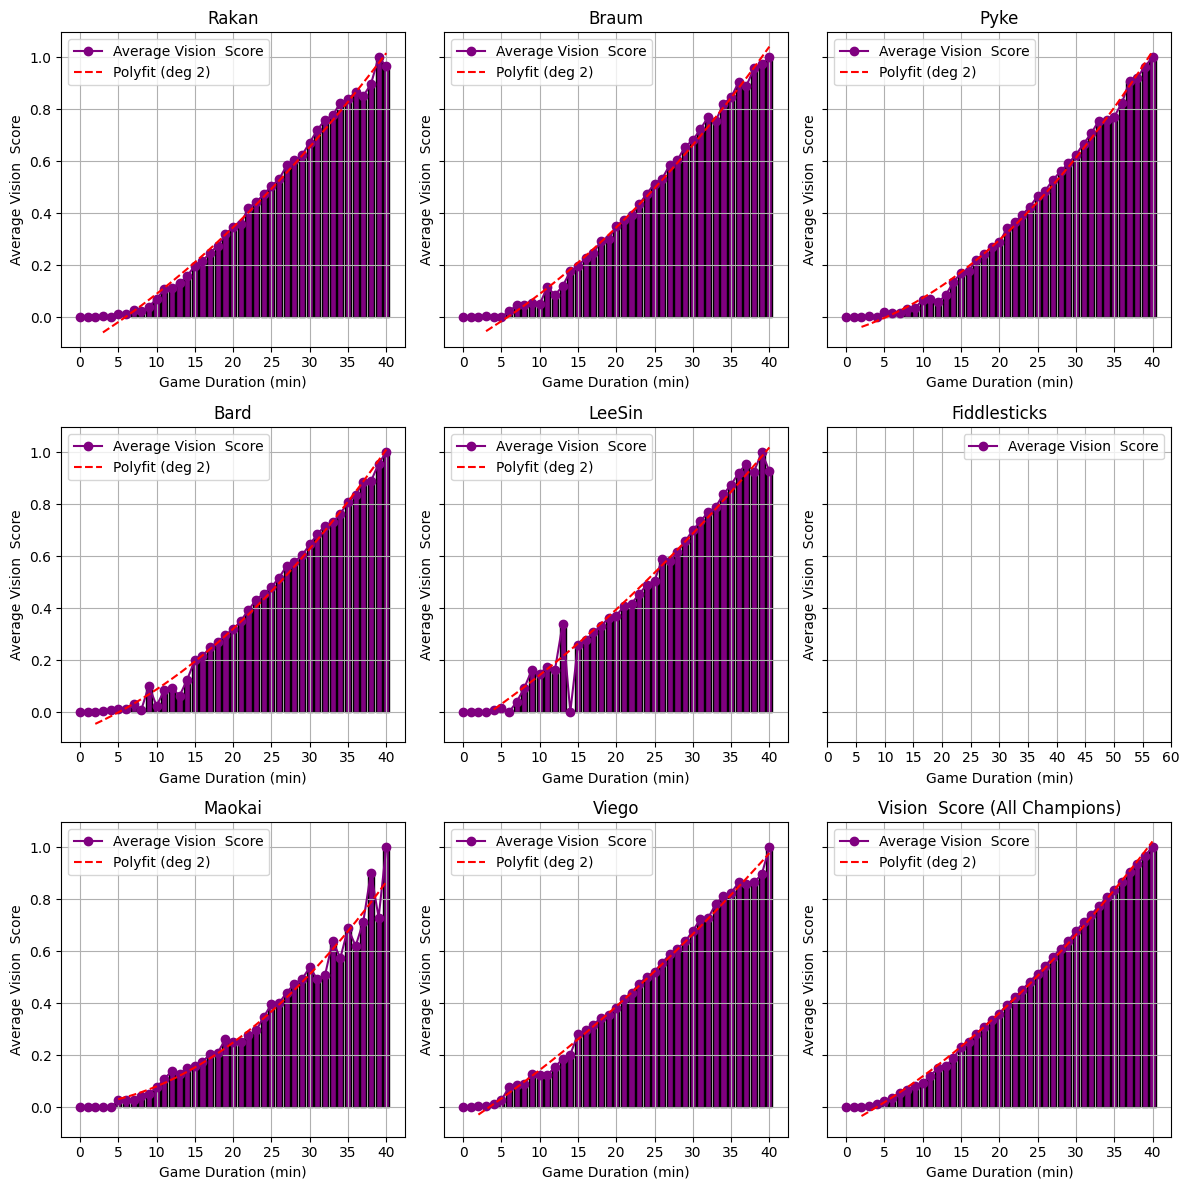

In [145]:
plot_champion_histograms(champion_avg_vision, all_avg_vision_per_min, pushing_champions, minutes, key="Vision Score", t=40, color="purple", poly_degree=2)

X*SQRT(X) Fit:
  R^2    = 0.9966892646733317



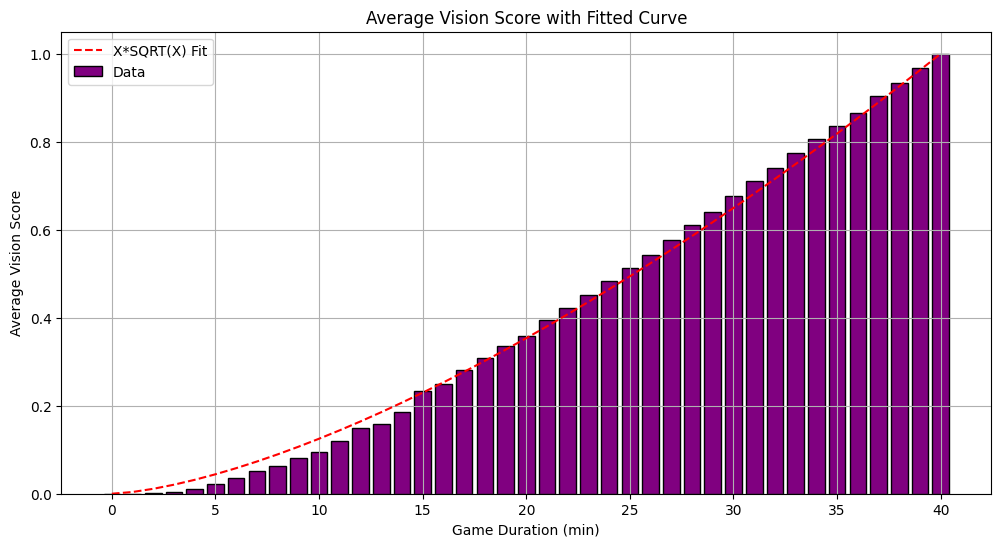

In [245]:
from scipy.optimize import curve_fit
t = 40
x, y = normilize_data(all_avg_vision_per_min, minutes, t=t)
y = y
# x_mask = (x > 5)
# x = x[x_mask]
# y = y[x_mask]
# Define candidate functions
def linear(t, b, a):
    return b * t + a

def quadratic(t, c, b, a):
    return c * t**2 + b * t + a

def logarithmic(t, a, b, c):
    return a * np.log(b * t + c)

def cubic(t, b, c, d):
    return b * t + c * t**2 + d * t**3

def exponential(t, a, b, c, d):
    # a * e^(b * t)
    return a * (np.exp(b * (t - c))) + d

def logistic(t, L, k, t0):
    return L / (1 + np.exp(-k * (t - t0)))

def gompertz(t, L, k, t0):
    return L * np.exp(-np.exp(-k * (t - t0)))

def tanh_curve(t, L, k):
    return L * np.tanh(k * t)

def logistic_linear(t, L, k, t0, m):
    return (L / (1 + np.exp(-k * (t - t0)))) + (m * t)

def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (ss_res / ss_tot)

models = {
    # "Linear":      (linear,     [1, 1]),      # initial guess: b=1
    # "Quadratic":   (quadratic,  [1, 1, 1]),   # initial guess: b=1, c=1
    # "Cubic":   (cubic,  [1, 1, 1]),   # initial guess: b=1, c=1, d=1
    # "Logarithmic": (logarithmic, [1, 1, 1]), # guess a=1000, b=0.05 (tweak if needed)
    # "Exponential": (exponential,[1000, 0.05, 1, 1]), # guess a=1000, b=0.05 (tweak if needed)
    # "Logistic Sigmoid": (logistic, [1, 1, 0.5]),  # Initial guess: L=1, k=1, t0=0.5
    # "Gompertz": (gompertz, [1, 1, 0.5]),
    # "Hyperbolic Tangent (Tanh)": (tanh_curve, [1, 1]),
}

results = {}

for name, (model_func, p0) in models.items():
    try:
        popt, pcov = curve_fit(model_func, x, y, p0=p0, maxfev=10000)
        # Predict using the fitted parameters
        y_fit = model_func(x, *popt)
        # Compute R²
        r2 = r_squared(y, y_fit)
        results[name] = (popt, r2)
    except RuntimeError:
        # If curve_fit fails to converge
        results[name] = ("Fit failed", None)

# Print results
plt.figure(figsize=(12, 6))
plt.bar(x, y, color='purple', edgecolor='black', label='Data')
for name, (params, r2) in results.items():
    print(f"{name}:")
    print(f"  Params = {params}")
    print(f"  R^2    = {r2}\n")
    if r2 is not None:
        plt.plot(x, models[name][0](x, *params), label=f"{name} (R²={r2:.2f})")

# plt.plot(x, (1/(40*40)) * x**2, 'r--', label='Quadratic Fit')
plt.plot(x, f(x), 'r--', label='X*SQRT(X) Fit')
print(f"X*SQRT(X) Fit:")
r2 = r_squared(y, f(x))
# print(f"  Params = {params}")
print(f"  R^2    = {r2}\n")
# if r2 is not None:
#     plt.plot(x, models[name][0](x, *params), label=f"{name} (R²={r2:.2f})")
plt.xlabel("Game Duration (min)")
plt.ylabel("Average Vision Score")
plt.title("Average Vision Score with Fitted Curve")
plt.legend()
plt.grid(True)
plt.show()

In [174]:
self_mitigation_champions = ["Rammus", "Malphite", "Garen", "DrMundo", "Sion", "Zac", "Alistar", "Amumu"]
champion_avg_mitigation, all_avg_mitigation_per_min  = await get_result_data(self_mitigation_champions, "damageSelfMitigated")


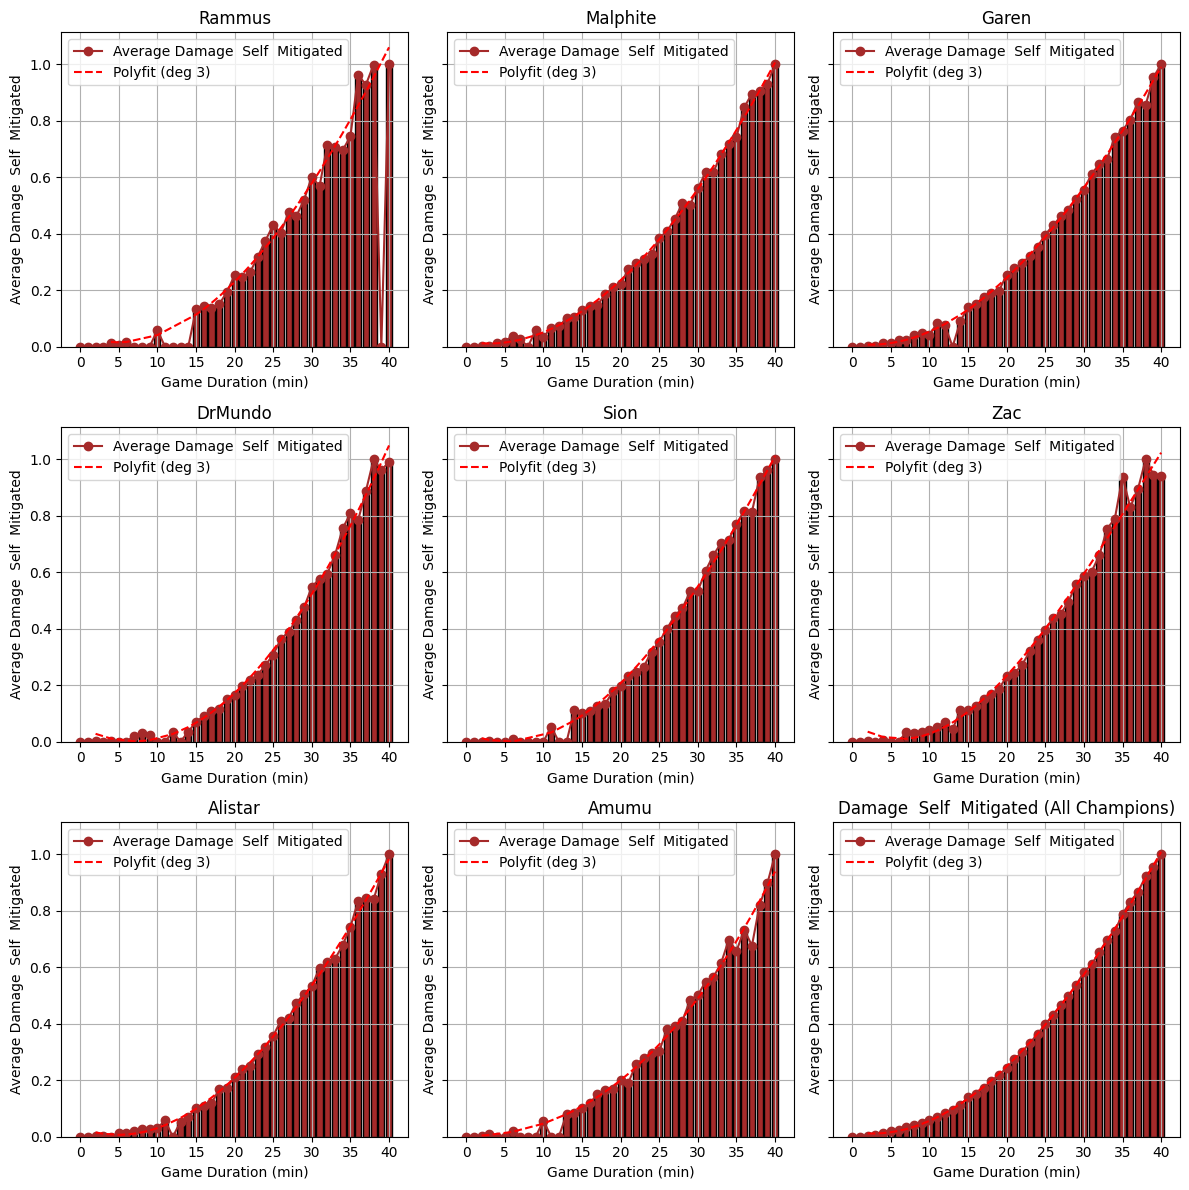

In [175]:
plot_champion_histograms(champion_avg_mitigation, all_avg_mitigation_per_min, self_mitigation_champions, minutes, key="Damage Self Mitigated", t=40, color="brown", poly_degree=3)

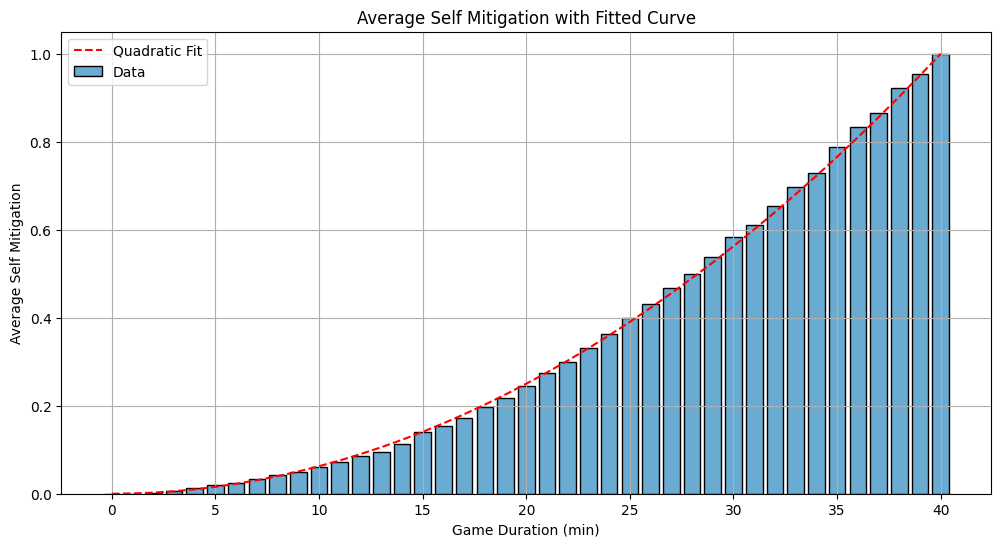

0.000625


In [248]:
from scipy.optimize import curve_fit
t = 40
x, y = normilize_data(all_avg_mitigation_per_min, minutes, t=t)
y = y
# x_mask = (x > 5)
# x = x[x_mask]
# y = y[x_mask]
# Define candidate functions
def linear(t, b, a):
    return b * t + a

def quadratic(t, c, b, a):
    return c * t**2 + b * t + a

def logarithmic(t, a, b, c):
    return a * np.log(b * t + c)

def cubic(t, b, c, d):
    return b * t + c * t**2 + d * t**3

def exponential(t, a, b, c, d):
    # a * e^(b * t)
    return a * (np.exp(b * (t - c))) + d

def logistic(t, L, k, t0):
    return L / (1 + np.exp(-k * (t - t0)))

def gompertz(t, L, k, t0):
    return L * np.exp(-np.exp(-k * (t - t0)))

def tanh_curve(t, L, k):
    return L * np.tanh(k * t)

def logistic_linear(t, L, k, t0, m):
    return (L / (1 + np.exp(-k * (t - t0)))) + (m * t)

def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (ss_res / ss_tot)

models = {
    # "Linear":      (linear,     [1, 1]),      # initial guess: b=1
    # "Quadratic":   (quadratic,  [1, 1, 1]),   # initial guess: b=1, c=1
    # "Cubic":   (cubic,  [1, 1, 1]),   # initial guess: b=1, c=1, d=1
    # "Logarithmic": (logarithmic, [1, 1, 1]), # guess a=1000, b=0.05 (tweak if needed)
    # "Exponential": (exponential,[1000, 0.05, 1, 1]), # guess a=1000, b=0.05 (tweak if needed)
    # "Logistic Sigmoid": (logistic, [1, 1, 0.5]),  # Initial guess: L=1, k=1, t0=0.5
    # "Gompertz": (gompertz, [1, 1, 0.5]),
    # "Hyperbolic Tangent (Tanh)": (tanh_curve, [1, 1]),
}

results = {}

for name, (model_func, p0) in models.items():
    try:
        popt, pcov = curve_fit(model_func, x, y, p0=p0, maxfev=10000)
        # Predict using the fitted parameters
        y_fit = model_func(x, *popt)
        # Compute R²
        r2 = r_squared(y, y_fit)
        results[name] = (popt, r2)
    except RuntimeError:
        # If curve_fit fails to converge
        results[name] = ("Fit failed", None)

# Print results
plt.figure(figsize=(12, 6))
plt.bar(x, y, color="#6AABD2", edgecolor='black', label='Data')
for name, (params, r2) in results.items():
    print(f"{name}:")
    print(f"  Params = {params}")
    print(f"  R^2    = {r2}\n")
    if r2 is not None:
        plt.plot(x, models[name][0](x, *params), label=f"{name} (R²={r2:.2f})")

plt.plot(x, (1/(t*t)) * x**2, 'r--', label='Quadratic Fit')

plt.xlabel("Game Duration (min)")
plt.ylabel("Average Self Mitigation")
plt.title("Average Self Mitigation with Fitted Curve")
plt.legend()
plt.grid(True)
plt.show()

print(1 / (40*40))